# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

## 1. <a name="1">Load the data</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [163]:
#read the data

data_path = 'C:\\Users\\El-Masria\\Downloads\\CC GENERAL.csv' #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [164]:
df.columns



Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [3]:
df.head(20)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   C10001    40.900749           0.818182      95.40              0.00   
1   C10002  3202.467416           0.909091       0.00              0.00   
2   C10003  2495.148862           1.000000     773.17            773.17   
3   C10004  1666.670542           0.636364    1499.00           1499.00   
4   C10005   817.714335           1.000000      16.00             16.00   
5   C10006  1809.828751           1.000000    1333.28              0.00   
6   C10007   627.260806           1.000000    7091.01           6402.63   
7   C10008  1823.652743           1.000000     436.20              0.00   
8   C10009  1014.926473           1.000000     861.49            661.49   
9   C10010   152.225975           0.545455    1281.60           1281.60   
10  C10011  1293.124939           1.000000     920.12              0.00   
11  C10012   630.794744           0.818182    1492.18           1492.18   
12  C10013  1516.928620           1.000000    3217.99           2500.23   
13  C10014   921.693369           1.000000    2137.93            419.96   
14  C10015  2772.772734           1.000000       0.00              0.00   
15  C10016  6886.213231           1.000000    1611.70              0.00   
16  C10017  2072.074354           0.875000       0.00              0.00   
17  C10018    41.089489           0.454545     519.00              0.00   
18  C10019  1989.072228           1.000000     504.35            166.00   
19  C10020  3577.970933           1.000000     398.64              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.40      0.000000             0.166667   
1                     0.00   6442.945483             0.000000   
2                     0.00      0.000000             1.000000   
3                     0.00    205.788017             0.083333   
4                     0.00      0.000000             0.083333   
5                  1333.28      0.000000             0.666667   
6                   688.38      0.000000             1.000000   
7                   436.20      0.000000             1.000000   
8                   200.00      0.000000             0.333333   
9                     0.00      0.000000             0.166667   
10                  920.12      0.000000             1.000000   
11                    0.00      0.000000             0.250000   
12                  717.76      0.000000             1.000000   
13                 1717.97      0.000000             0.750000   
14                    0.00    346.811390             0.000000   
15                 1611.70   2301.491267             0.500000   
16                    0.00   2784.274703             0.000000   
17                  519.00      0.000000             0.416667   
18                  338.35      0.000000             0.666667   
19                  398.64      0.000000             1.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.000000                          0.083333   
1                     0.000000                          0.000000   
2                     1.000000                          0.000000   
3                     0.083333                          0.000000   
4                     0.083333                          0.000000   
5                     0.000000                          0.583333   
6                     1.000000                          1.000000   
7                     0.000000                          1.000000   
8                     0.083333                          0.250000   
9                     0.166667                          0.000000   
10                    0.000000                          1.000000   
11                    0.250000                          0.000000   
12                    0.250000                          0.916667   
13                    0.166667                          0.750000   
14                    0.000000           

In [7]:
# Let's see the data types and non-null values for each column
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Axes: >

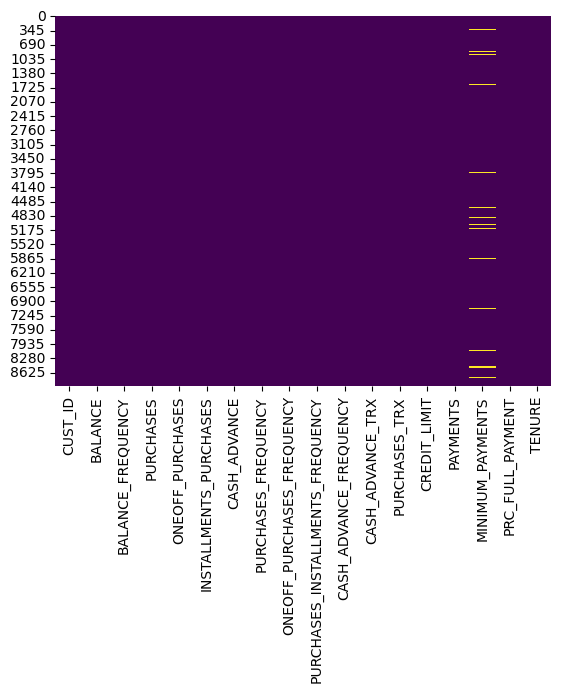

In [6]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [7]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

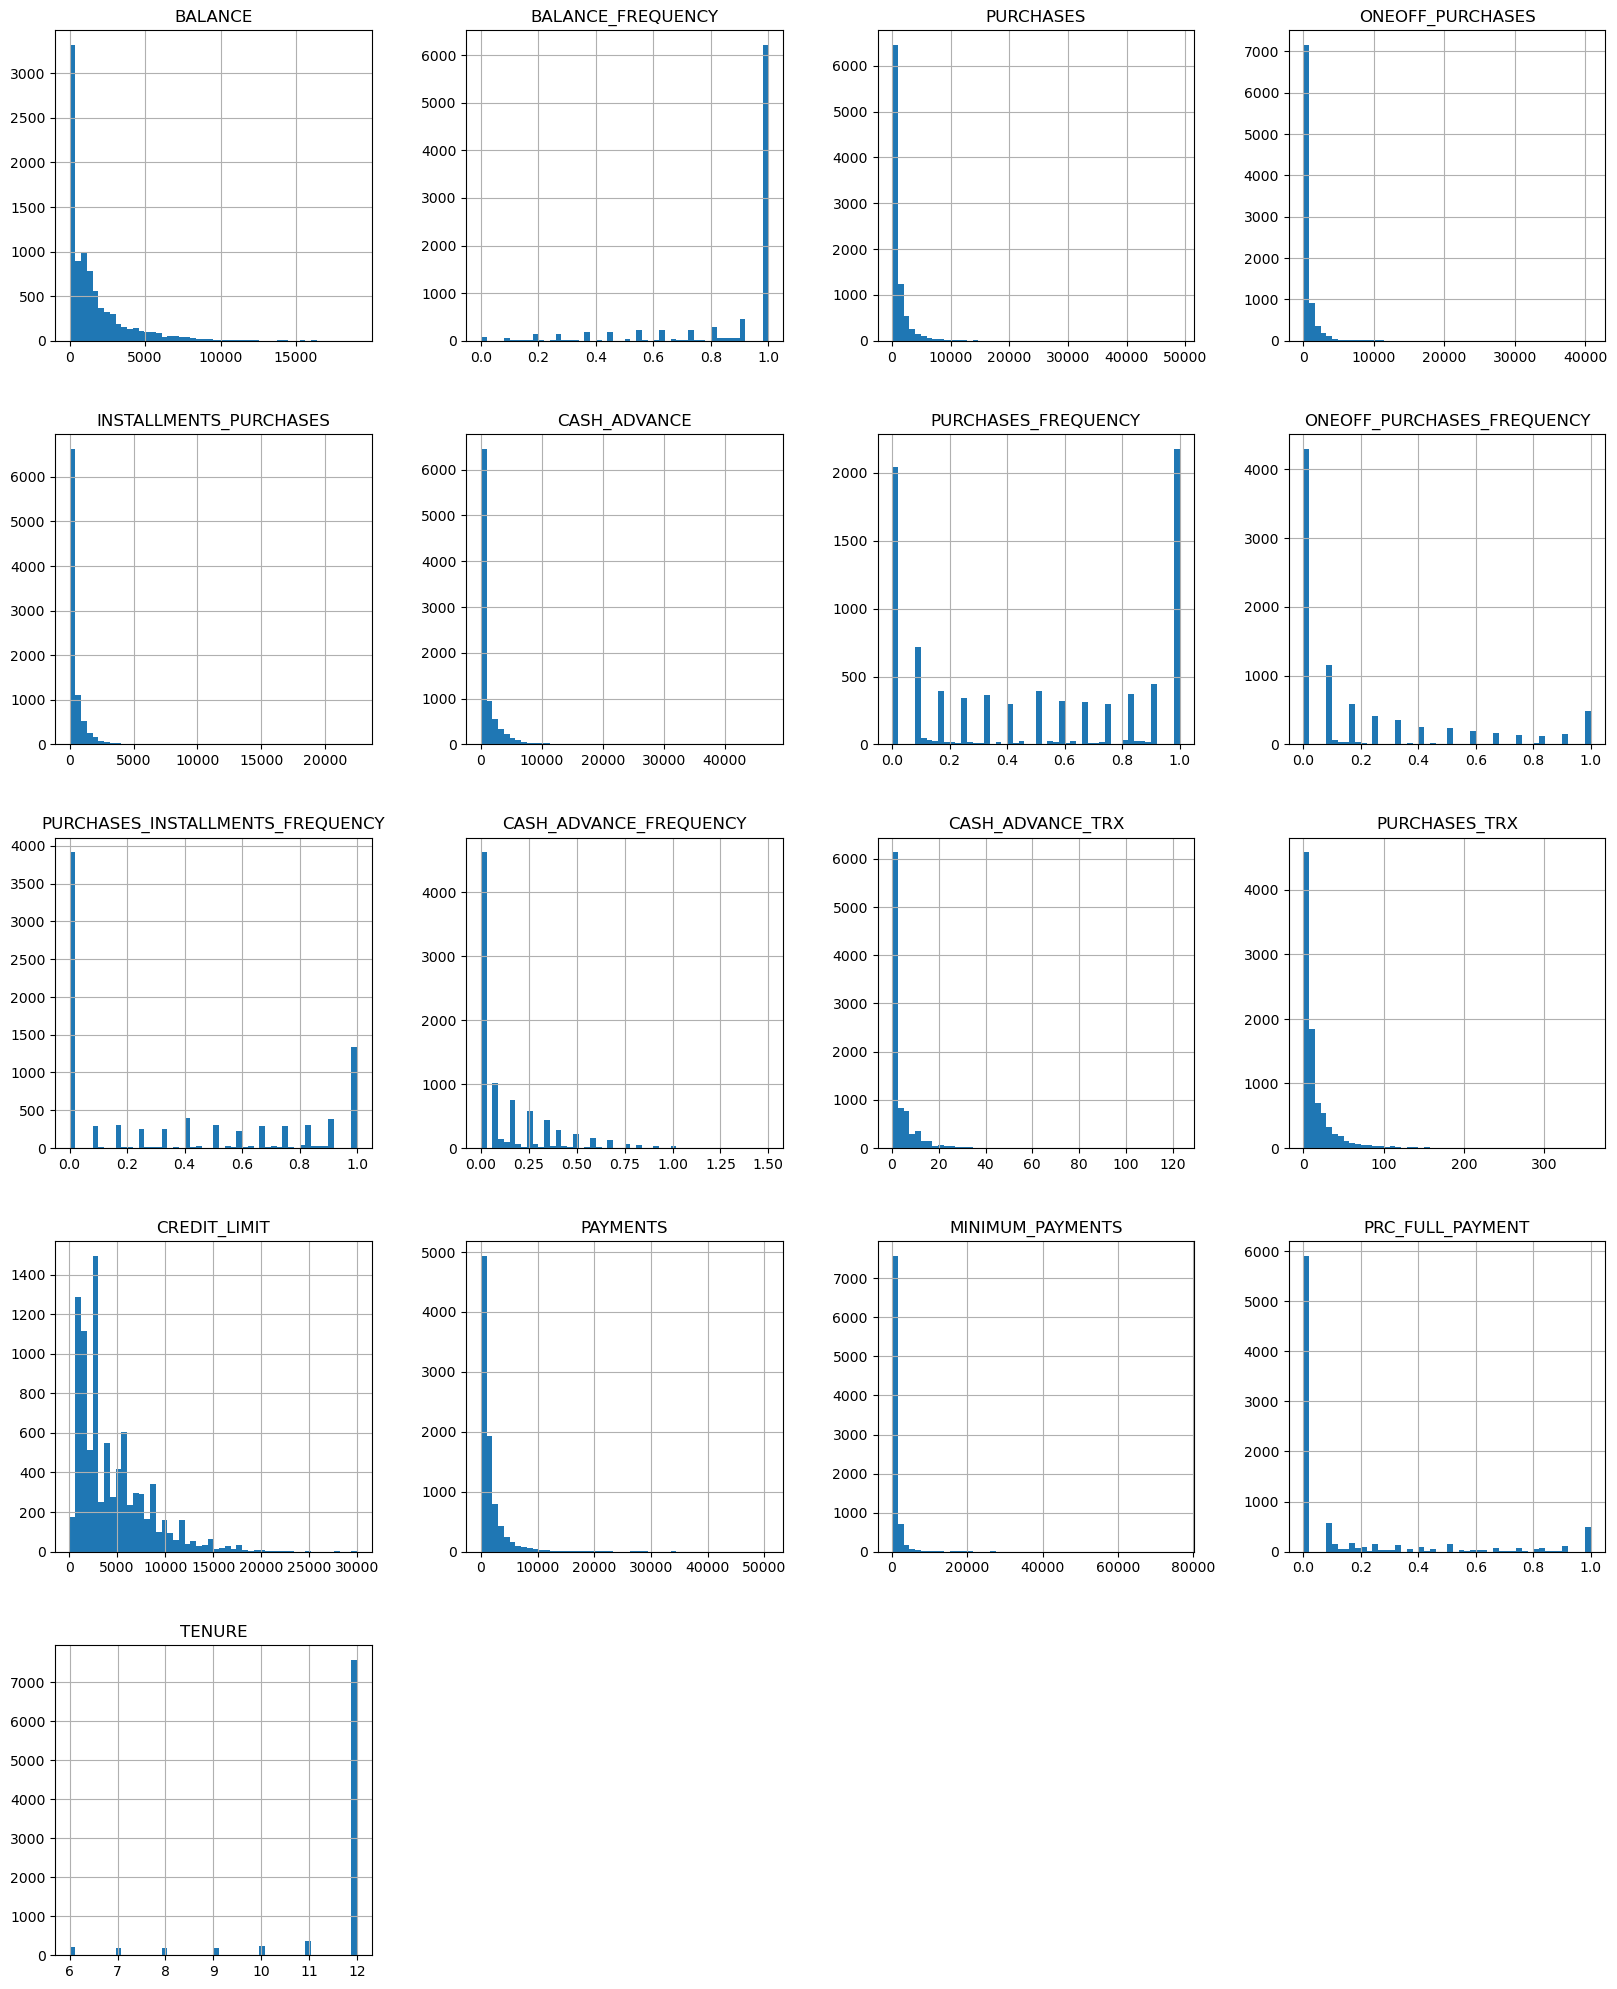

In [8]:
df.hist(bins=50, figsize=(20, 25))
plt.show()


-Most people either don't buy anything or buy it very often.
<br>
-The majority of credit card holders have been cardholders for more than 12 months.

In [12]:
# feel free to investigate what you want

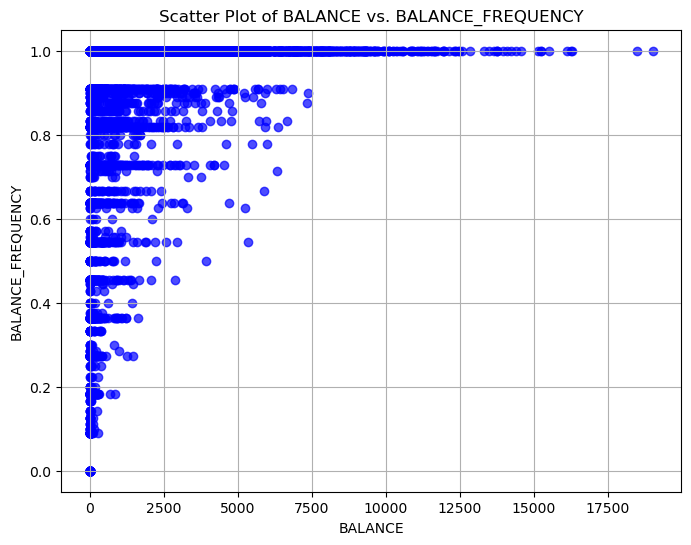

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BALANCE'], df['BALANCE_FREQUENCY'], color='blue', alpha=0.7)
plt.title('Scatter Plot of BALANCE vs. BALANCE_FREQUENCY')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.grid(True)
plt.show()

-Most of the card holders have their balnance between 0 and 2500 
<br>
-Most of the card holders use it frequently as BALANCE_FREQUENCY refers to updating or changing the balance which means using the card


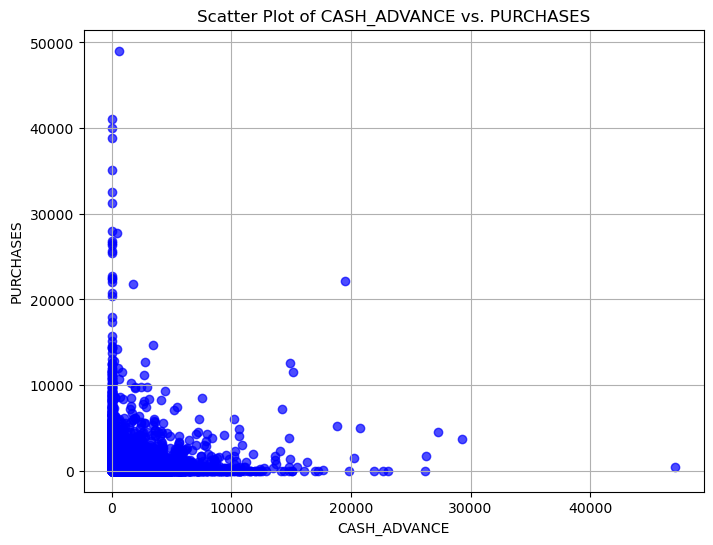

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df['CASH_ADVANCE'], df['PURCHASES'], color='blue', alpha=0.7)
plt.title('Scatter Plot of CASH_ADVANCE vs. PURCHASES')
plt.xlabel('CASH_ADVANCE')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.show()


Most of the customers do transactions as purchases and cash-in-advance equally

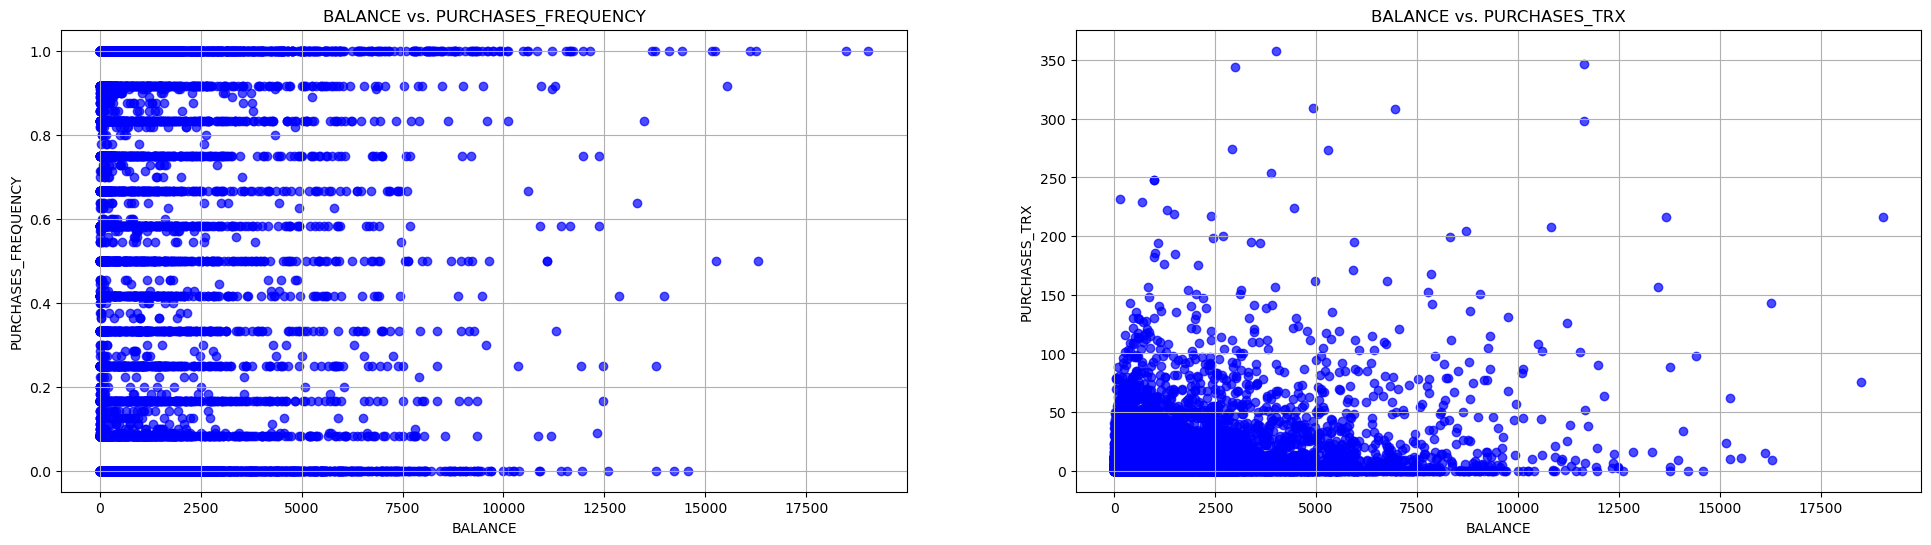

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

axes[0].scatter(df['BALANCE'], df['PURCHASES_FREQUENCY'], color='blue', alpha=0.7)
axes[0].set_title('BALANCE vs. PURCHASES_FREQUENCY')
axes[0].set_xlabel('BALANCE')
axes[0].set_ylabel('PURCHASES_FREQUENCY')
axes[0].grid(True)

axes[1].scatter(df['BALANCE'], df['PURCHASES_TRX'], color='blue', alpha=0.7)
axes[1].set_title('BALANCE vs. PURCHASES_TRX')
axes[1].set_xlabel('BALANCE')
axes[1].set_ylabel('PURCHASES_TRX')
axes[1].grid(True)


Balance deosnt affect PURCHASES-FREQUENCY but affects PURCHASES_TRX as for lower BALANCE, PURCHASES_TRX is lower

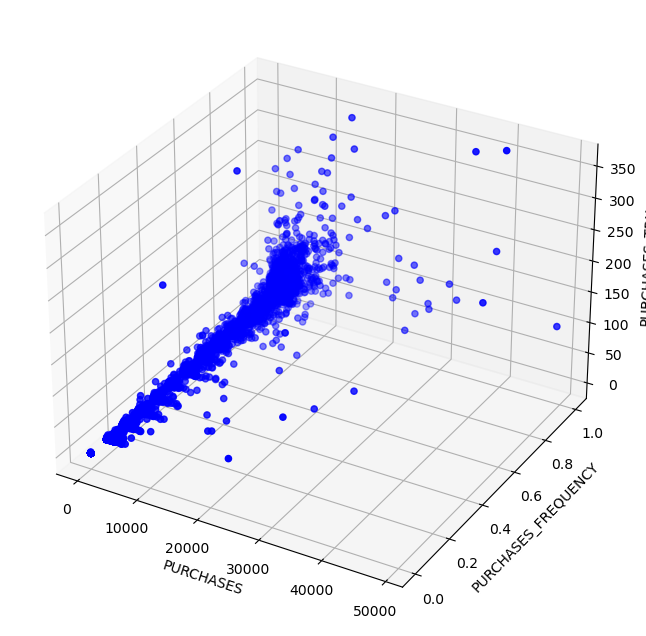

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['PURCHASES'], df['PURCHASES_FREQUENCY'], df['PURCHASES_TRX'], c='blue', marker='o')

ax.set_xlabel('PURCHASES')
ax.set_ylabel('PURCHASES_FREQUENCY')
ax.set_zlabel('PURCHASES_TRX')

plt.show()

Most of the card holders have a purchases ranges from 0 to 1000 and dont buy a lot for each item as they pay 100 for an item on average, while less people buy items for less amount and less pay more for items



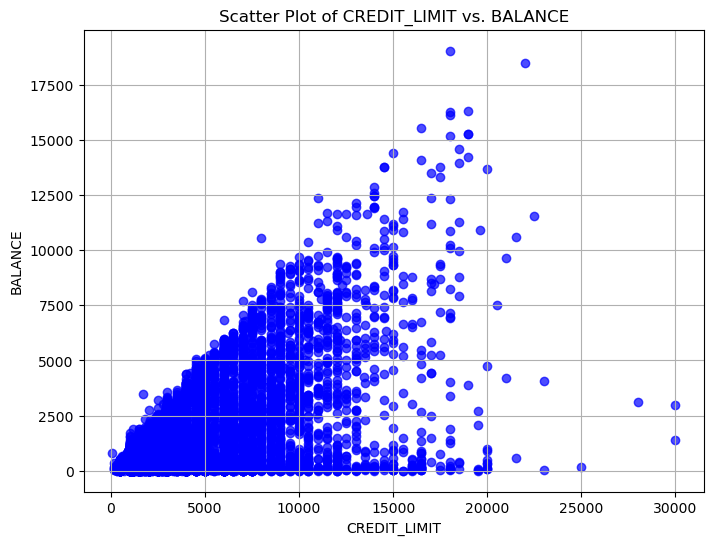

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['CREDIT_LIMIT'], df['BALANCE'], color='blue', alpha=0.7)
plt.title('Scatter Plot of CREDIT_LIMIT vs. BALANCE')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('BALANCE')
plt.grid(True)
plt.show()

As BALANCE increaes, CREDIT_LIMIT increases

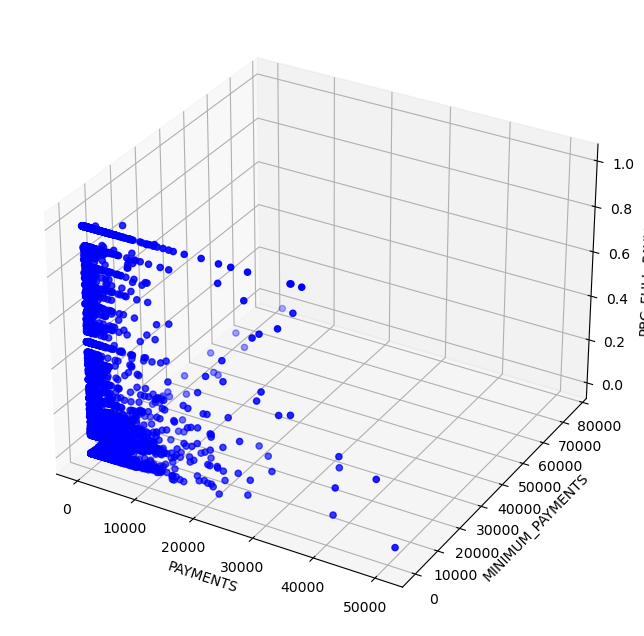

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['PAYMENTS'], df['MINIMUM_PAYMENTS'], df['PRC_FULL_PAYMENT'], c='blue', marker='o')

ax.set_xlabel('PAYMENTS')
ax.set_ylabel('MINIMUM_PAYMENTS')
ax.set_zlabel('PRC_FULL_PAYMENT')

plt.show()

Most of the customers pay low PRC_FULL_PAYMENT

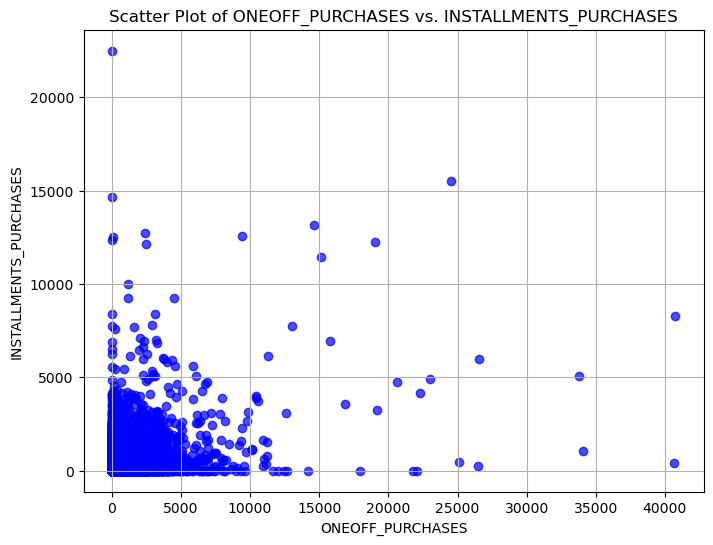

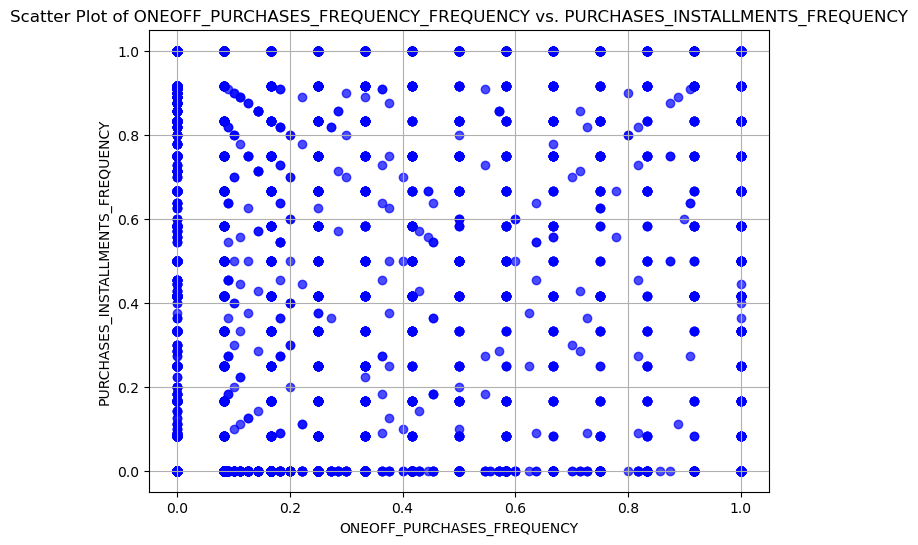

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['ONEOFF_PURCHASES'], df['INSTALLMENTS_PURCHASES'], color='blue', alpha=0.7)
plt.title('Scatter Plot of ONEOFF_PURCHASES vs. INSTALLMENTS_PURCHASES')
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('INSTALLMENTS_PURCHASES')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['ONEOFF_PURCHASES_FREQUENCY'], df['PURCHASES_INSTALLMENTS_FREQUENCY'], color='blue', alpha=0.7)
plt.title('Scatter Plot of ONEOFF_PURCHASES_FREQUENCY_FREQUENCY vs. PURCHASES_INSTALLMENTS_FREQUENCY')
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.grid(True)
plt.show()



INSTALLMENTS_PURCHASES is prefered by some people but not very highly


In [165]:
df.drop(columns='CUST_ID', inplace=True)

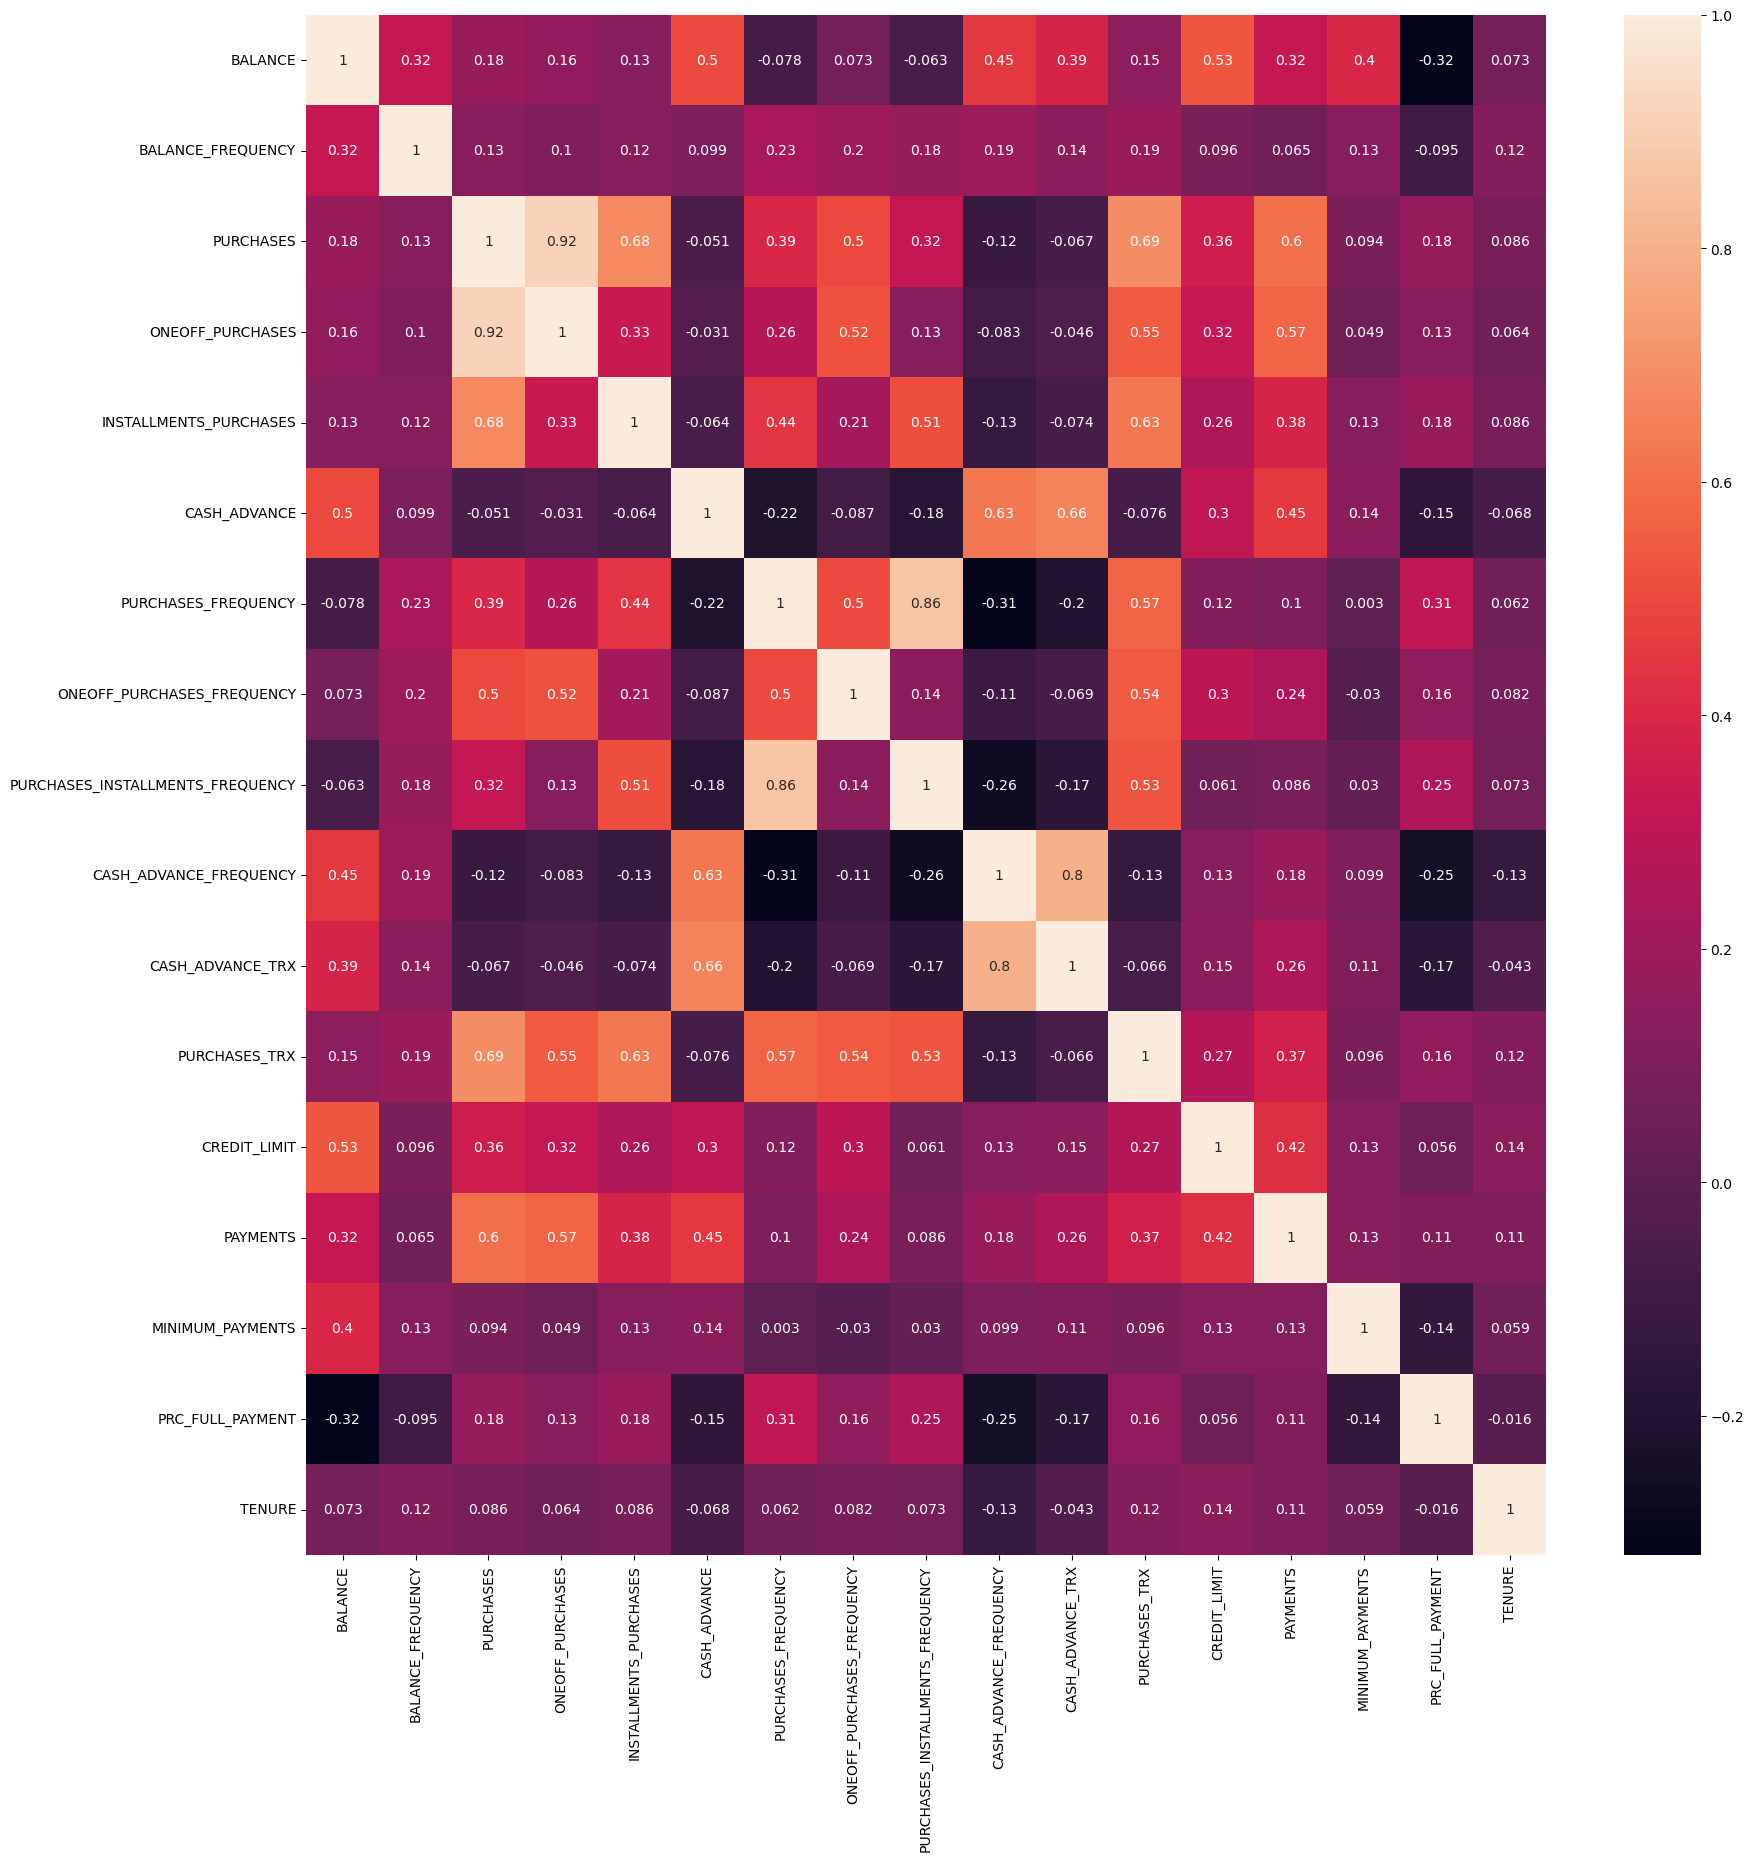

In [18]:
plt.figure(figsize=(20,20))
corr_data = df.corr()
sns.heatmap(corr_data,annot=True)
plt.show()

PURCHASES and ONEOFF_PURCHASES are highly correlated which is logical as ONEOFF_PURCHASES should afftect 
PURCHASES more than INSTALMENT_PURCHASES because INSTALMENT_PURCHASES are smaller amounts to be added


PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY are highly correlated as it was mentioned previously 
(PURCHASES_INSTALLMENTS_FREQUENCY is prefered by most of the cardholers so it increases PURCHASES_FREQUENCY) 

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-  Missing values      <br>
2-  Outliers        <br>
3-          <br>

In [166]:
#make a copy for the original dataset
df_copy=df.copy()


### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**
Missing values

In [167]:
#solution 
# Filling missing values with mean
df_copy['MINIMUM_PAYMENTS'] = df_copy['MINIMUM_PAYMENTS'].fillna(df_copy['MINIMUM_PAYMENTS'].mean())
df_copy['CREDIT_LIMIT'] = df_copy['CREDIT_LIMIT'].fillna(df_copy['CREDIT_LIMIT'].mean())

In [168]:
#test 
df_copy.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Second issue** Outliers

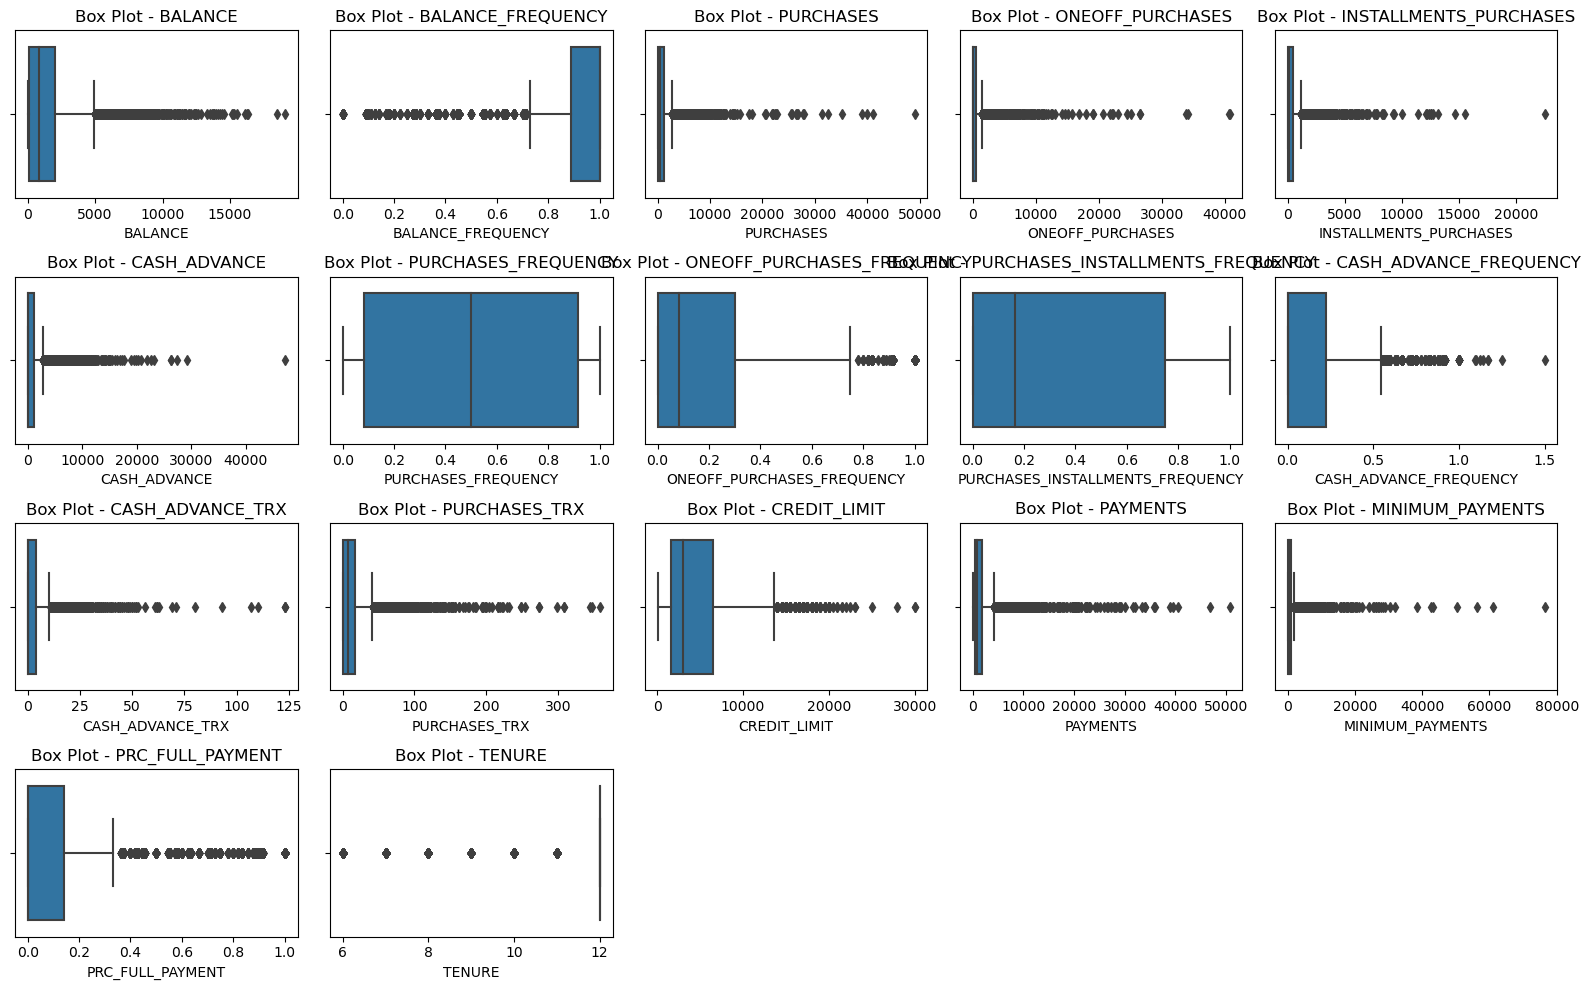

In [22]:
plt.figure(figsize=(16, 10))

for i, column in enumerate(df_copy.select_dtypes(include='number').columns):
    plt.subplot(4, 5, i+1)  # Adjust the subplot grid based on the number of features
    sns.boxplot(x=df_copy[column])
    plt.title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

Outliers could represent unique customer behaviors or specific financial events, so we better robust it rather removing it.

  File "C:\Users\El-Masria\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\El-Masria\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\El-Masria\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\El-Masria\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


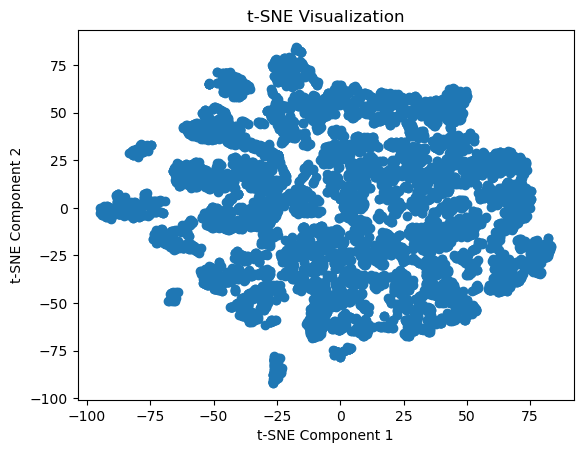

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
data_for_tsne = df_copy[df_copy.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [9]:
from sklearn import preprocessing

## Preprocessing 1 (Log Transformation - Min-Max - PCA)

As most of the columns are right skewed, we can transform using log transformation or box-cox
We can see if box-cox is suitable by plotting a log-log-scale figure for the feature and if it is a straight line so there is a power-law relationship and box-cox is suitable. Otherwise, it is log transformation

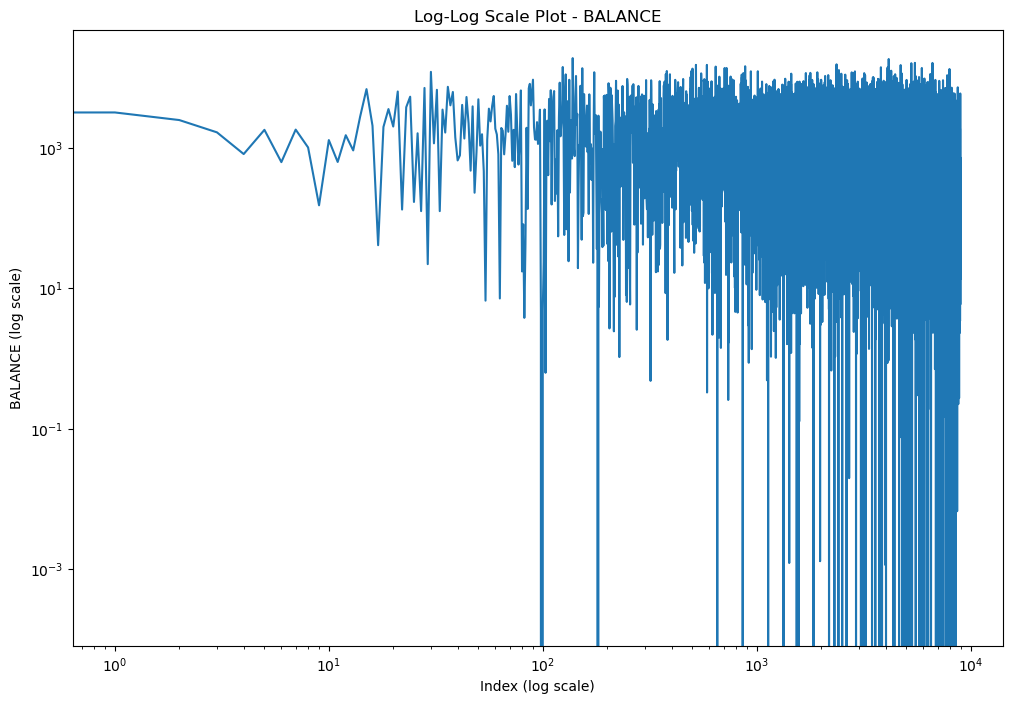

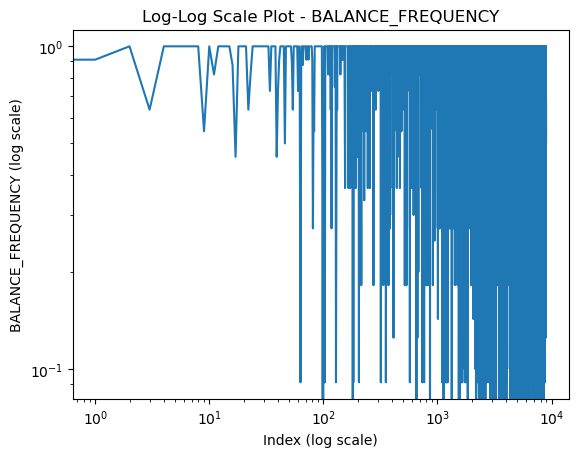

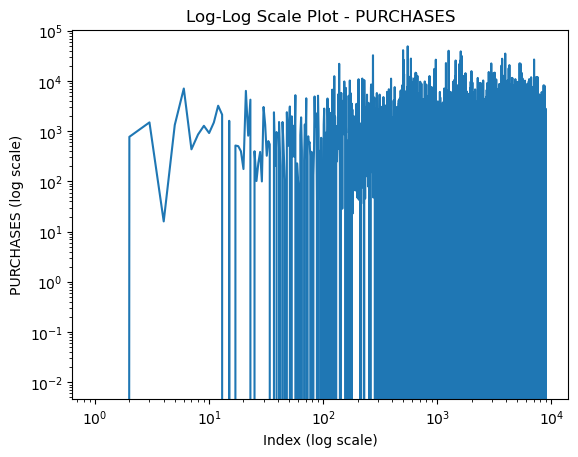

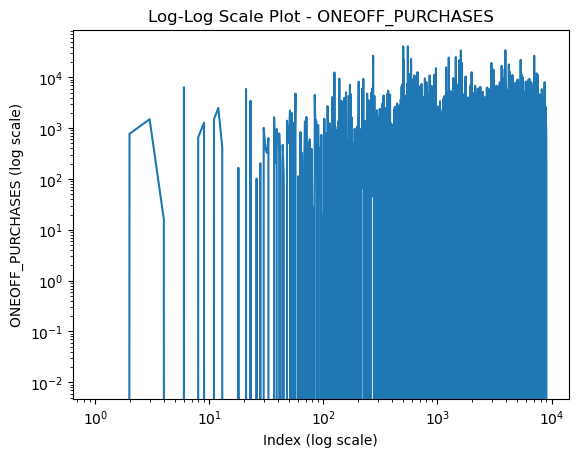

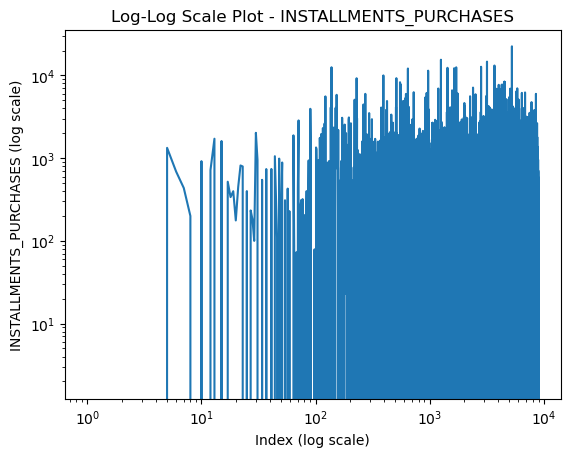

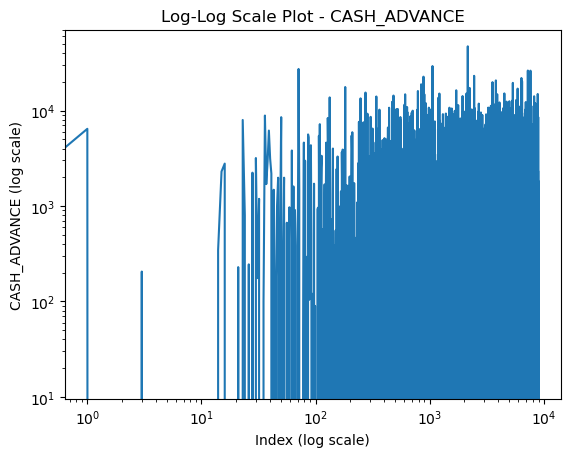

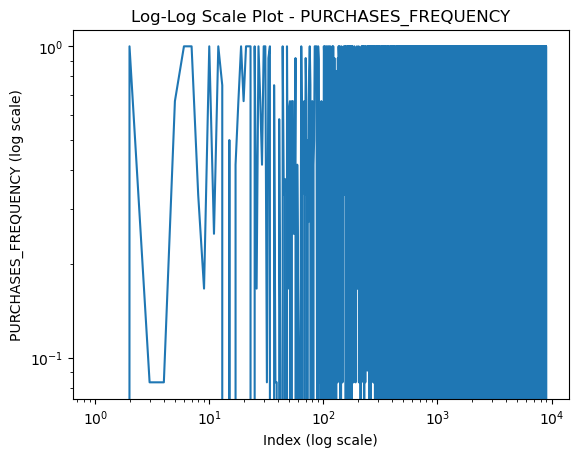

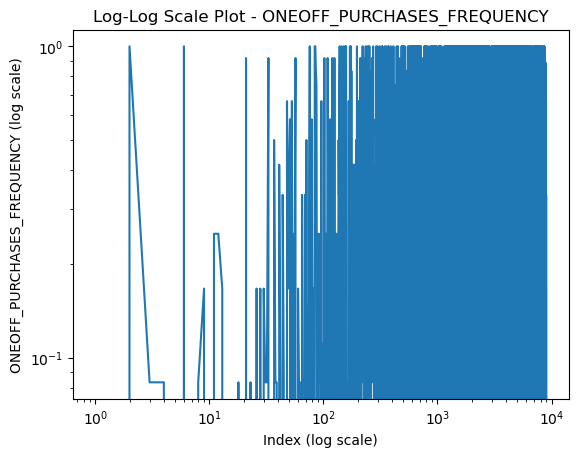

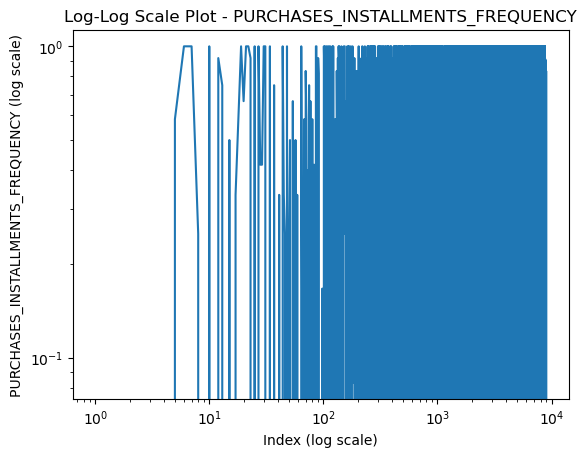

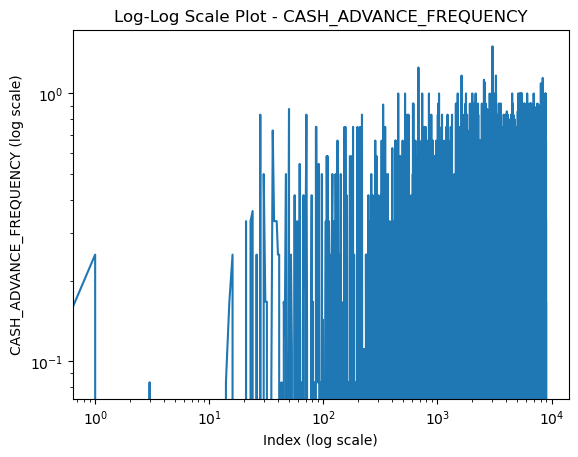

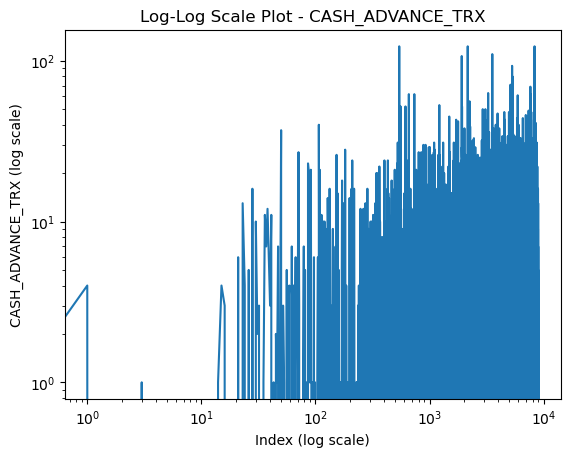

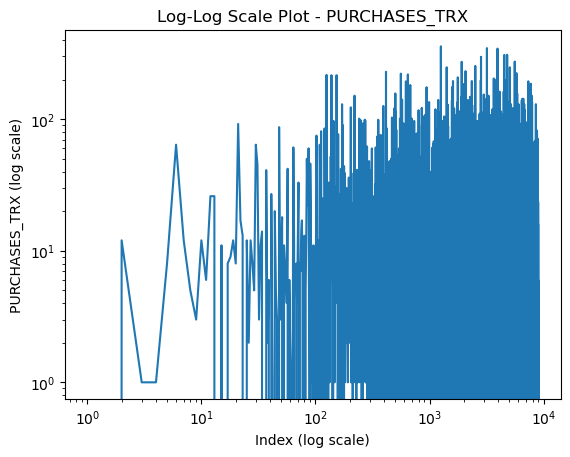

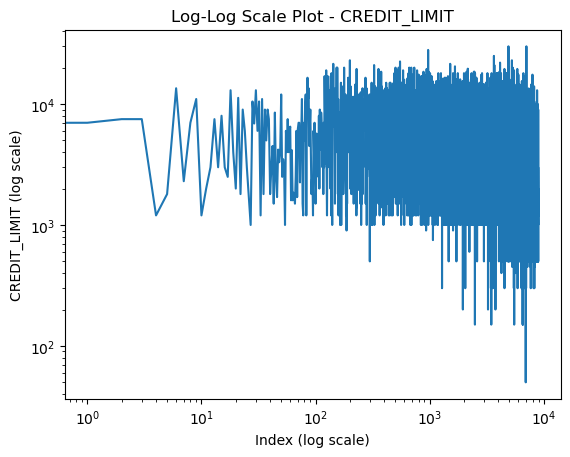

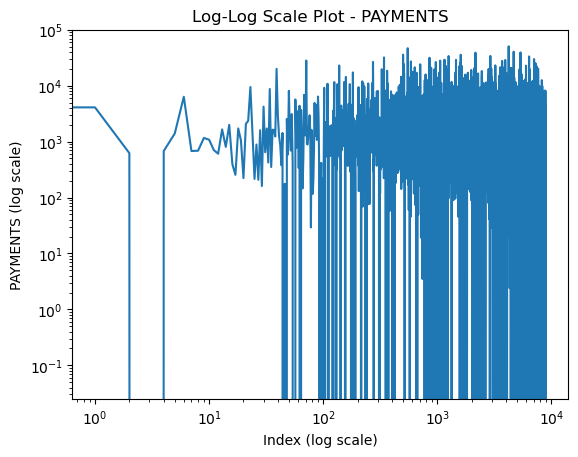

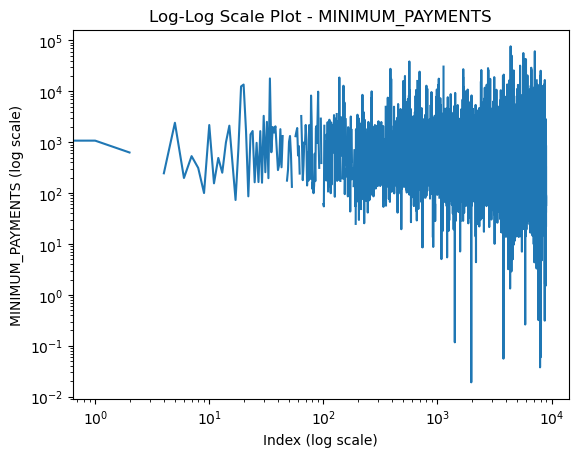

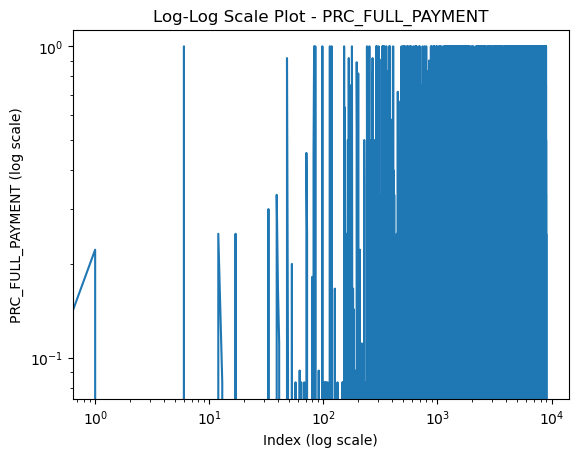

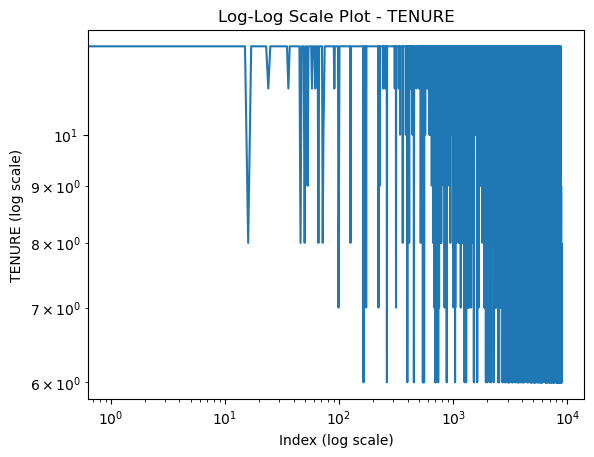

In [25]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(df.columns):
    plt.loglog(df[column])
    plt.title(f'Log-Log Scale Plot - {column}')
    plt.xlabel('Index (log scale)')
    plt.ylabel(f'{column} (log scale)')
    plt.show()


In [170]:
df_copy1 = df_copy.copy()
df_copy1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [169]:
df_copy_all = df_copy.copy()
df_copy_all.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [17]:
df_copy_all2 = df_copy.copy()
df_copy_all2

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

## Log Transformation

In [18]:
columns_to_log_transform = ['BALANCE',  'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

def log_transform_with_zero_handling(value):
    if value == 0:
        return np.log(0.0001)  # Handle the case where value is 0
    else:
        return np.log(value)

# Apply the log transformation using the log_transform_with_zero_handling function
df_copy1[columns_to_log_transform] = df_copy1[columns_to_log_transform].applymap(log_transform_with_zero_handling)


df_copy1


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.711148           0.818182   4.558079         -9.210340   
1     8.071677           0.909091  -9.210340         -9.210340   
2     7.822104           1.000000   6.650499          6.650499   
3     7.418583           0.636364   7.312553          7.312553   
4     6.706513           1.000000   2.772589          2.772589   
...        ...                ...        ...               ...   
8945  3.349677           1.000000   5.673736         -9.210340   
8946  2.954036           1.000000   5.703782         -9.210340   
8947  3.152679           0.833333   4.972587         -9.210340   
8948  2.599541           0.833333  -9.210340         -9.210340   
8949  5.920795           0.666667   6.996910          6.996910   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.558079     -9.210340             0.166667   
1                  -9.210340      8.770741             0.000000   
2                  -9.210340     -9.210340             1.000000   
3                  -9.210340      5.326847             0.083333   
4                  -9.210340     -9.210340             0.083333   
...                      ...           ...                  ...   
8945                5.673736     -9.210340             1.000000   
8946                5.703782     -9.210340             1.000000   
8947                4.972587     -9.210340             0.833333   
8948               -9.210340      3.598921             0.000000   
8949               -9.210340      4.844502             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -9.210340         -9.210340       0.693147      6.907755   
1                  -1.386294          1.386294      -9.210340      8.853665   
2                  -9.210340         -9.210340       2.484907      8.922658   
3                  -2.484911          0.000000       0.000000      8.922658   
4                  -9.210340         -9.210340       0.000000      7.090077   
...                      ...               ...            ...           ...   
8945               -9.210340         -9.210340       1.791759      6.907755   
8946               -9.210340         -9.210340       1.791759      6.907755   
8947               -9.210340         -9.210340       1.609438      6.907755   
8948               -1.791757          0.693147      -9.210340      6.214608   
8949               -1.098613          0.693147       3.135494      7.090077   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     5.307287          4.938135          0.000000      12  
1     8.319482          6.977599          0.222222      12  
2     6.433047          6.441401          0.000000      12  
3    -9.210340          6.761812          0.000000      12  
4     6.519641          5.500406          0.000000      12  
...        ...               ...               ...     ...  
8945  5.785653          3.889499          0.500000       6  
8946  5.619898          6.761812          0.000000       6  
8947  4.397786          4.411808          0.250000       6  
8948  3.9

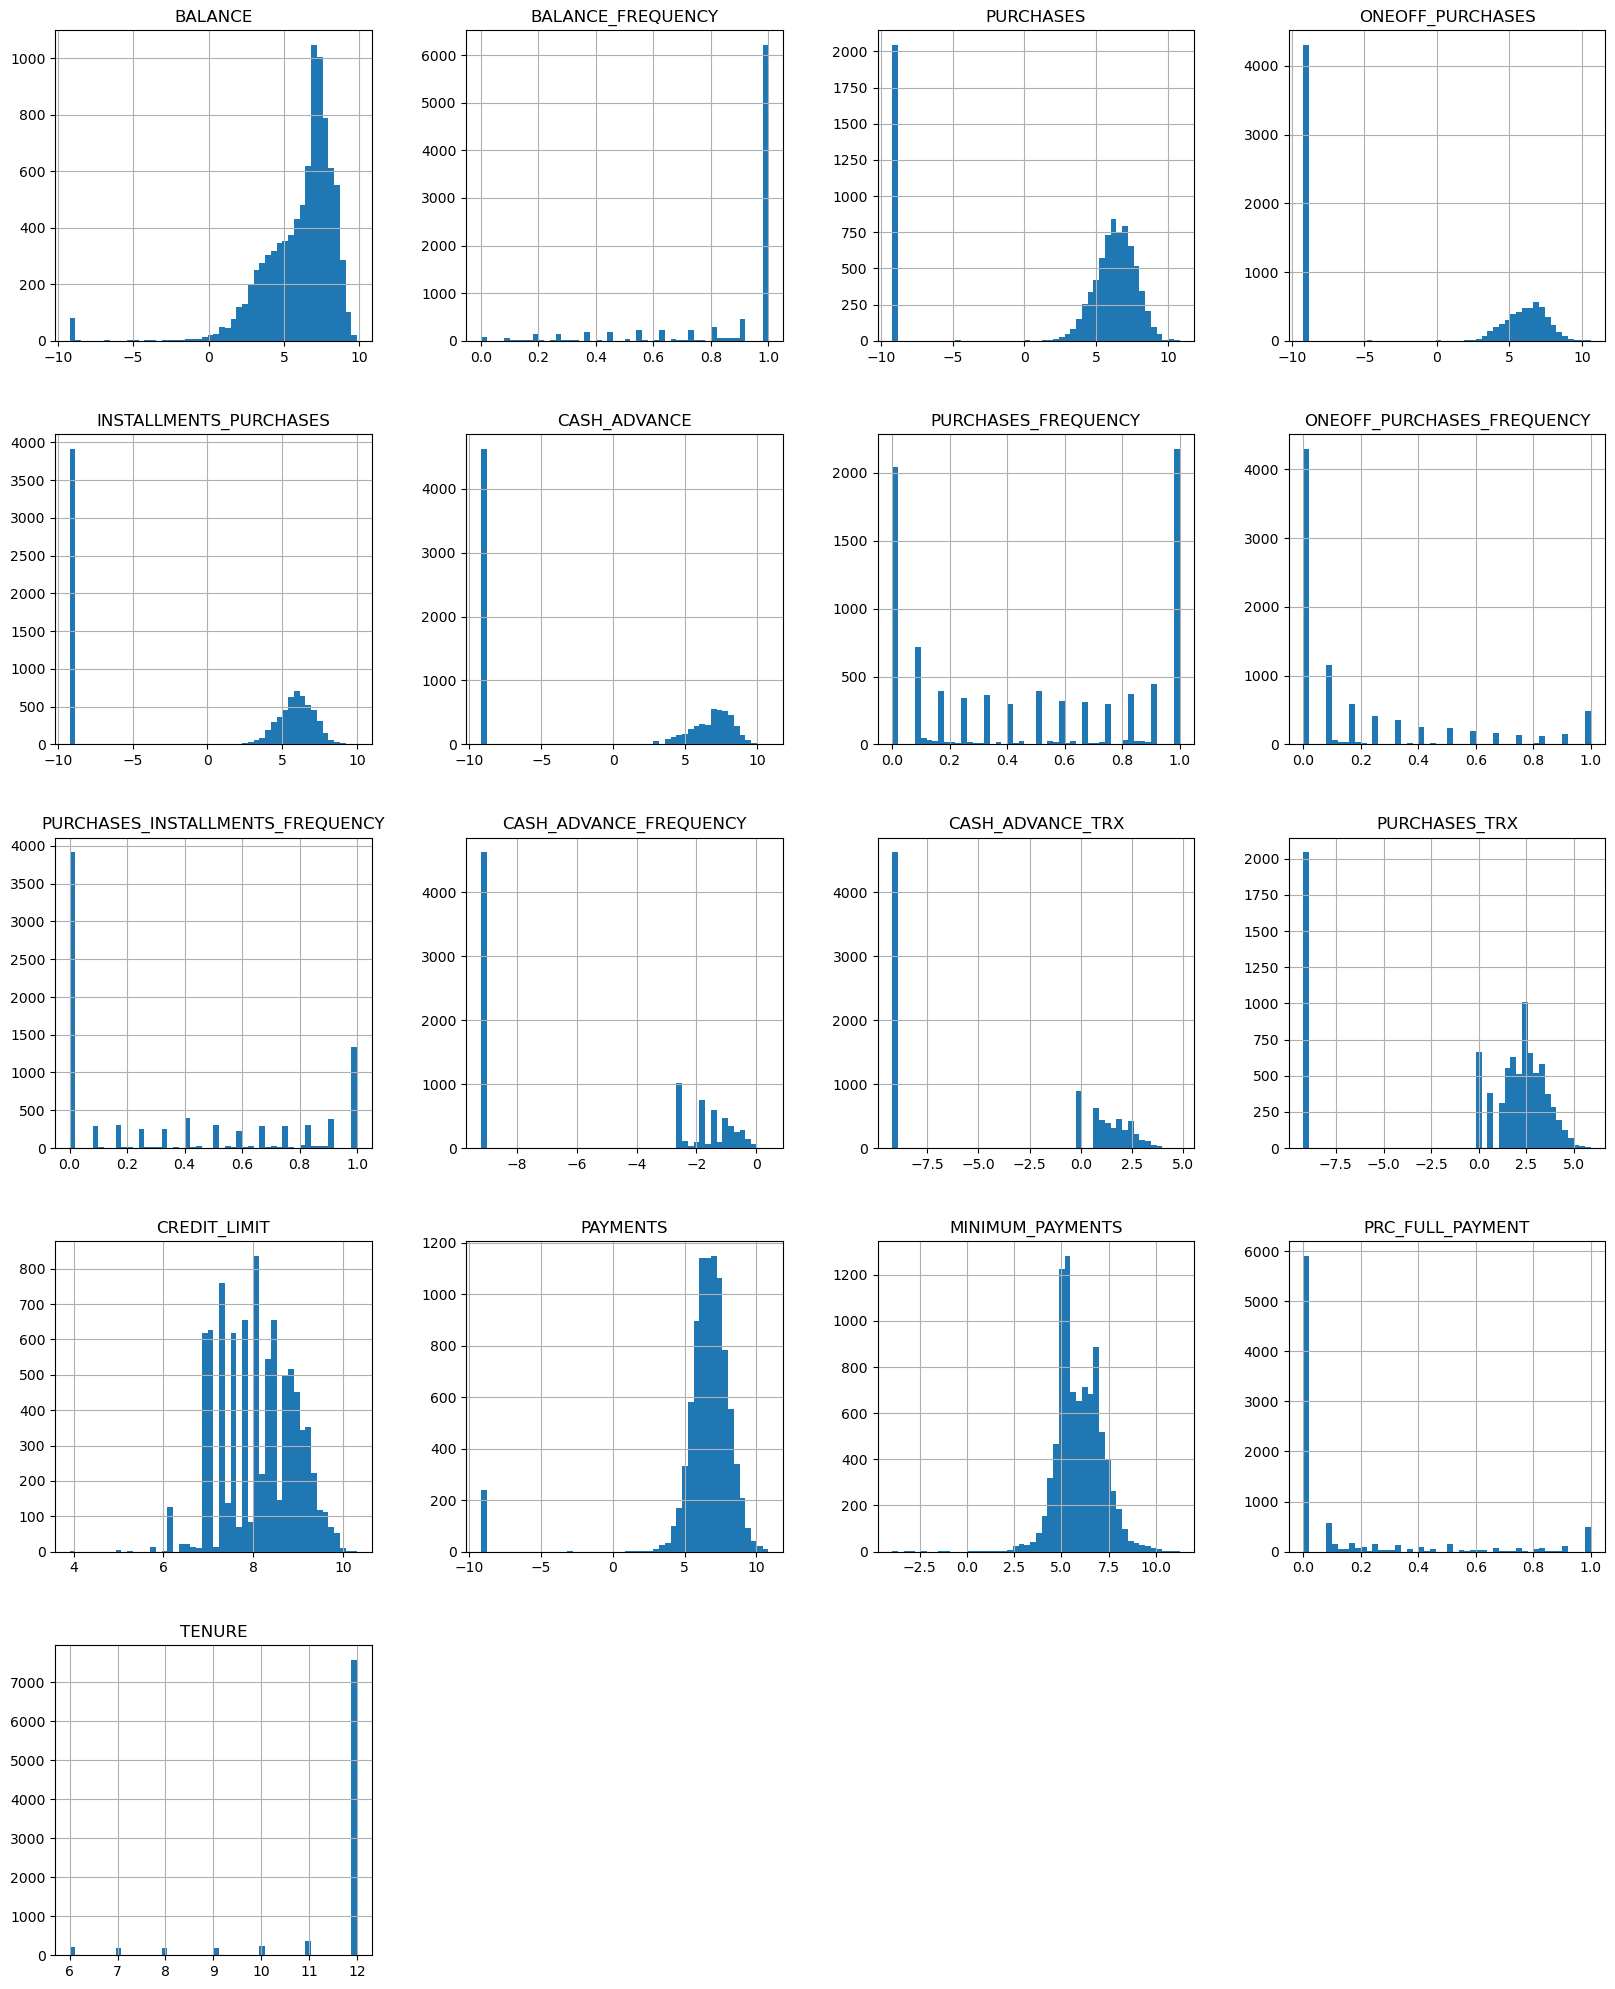

In [159]:
df_copy1.hist(bins=50, figsize=(20, 25))
plt.show()

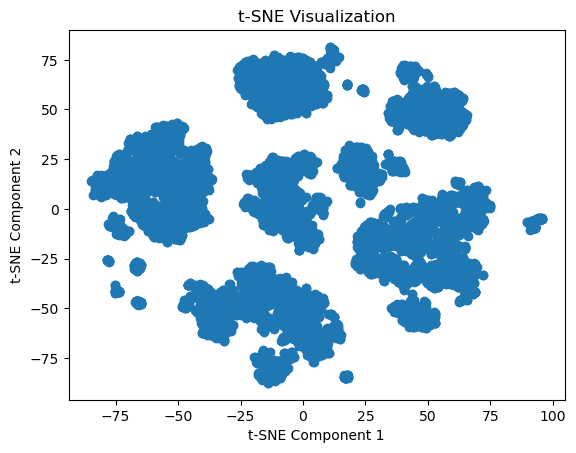

In [160]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
data_for_tsne = df_copy1[df_copy1.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

data started looking more separated after log transformation

In [129]:
df_log = df_copy1.copy()

In [172]:
df_log

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.711148           0.818182   4.558079         -9.210340   
1     8.071677           0.909091  -9.210340         -9.210340   
2     7.822104           1.000000   6.650499          6.650499   
3     7.418583           0.636364   7.312553          7.312553   
4     6.706513           1.000000   2.772589          2.772589   
...        ...                ...        ...               ...   
8945  3.349677           1.000000   5.673736         -9.210340   
8946  2.954036           1.000000   5.703782         -9.210340   
8947  3.152679           0.833333   4.972587         -9.210340   
8948  2.599541           0.833333  -9.210340         -9.210340   
8949  5.920795           0.666667   6.996910          6.996910   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.558079     -9.210340             0.166667   
1                  -9.210340      8.770741             0.000000   
2                  -9.210340     -9.210340             1.000000   
3                  -9.210340      5.326847             0.083333   
4                  -9.210340     -9.210340             0.083333   
...                      ...           ...                  ...   
8945                5.673736     -9.210340             1.000000   
8946                5.703782     -9.210340             1.000000   
8947                4.972587     -9.210340             0.833333   
8948               -9.210340      3.598921             0.000000   
8949               -9.210340      4.844502             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -9.210340         -9.210340       0.693147      6.907755   
1                  -1.386294          1.386294      -9.210340      8.853665   
2                  -9.210340         -9.210340       2.484907      8.922658   
3                  -2.484911          0.000000       0.000000      8.922658   
4                  -9.210340         -9.210340       0.000000      7.090077   
...                      ...               ...            ...           ...   
8945               -9.210340         -9.210340       1.791759      6.907755   
8946               -9.210340         -9.210340       1.791759      6.907755   
8947               -9.210340         -9.210340       1.609438      6.907755   
8948               -1.791757          0.693147      -9.210340      6.214608   
8949               -1.098613          0.693147       3.135494      7.090077   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     5.307287          4.938135          0.000000      12  
1     8.319482          6.977599          0.222222      12  
2     6.433047          6.441401          0.000000      12  
3    -9.210340          6.761812          0.000000      12  
4     6.519641          5.500406          0.000000      12  
...        ...               ...               ...     ...  
8945  5.785653          3.889499          0.500000       6  
8946  5.619898          6.761812          0.000000       6  
8947  4.397786          4.411808          0.250000       6  
8948  3.9

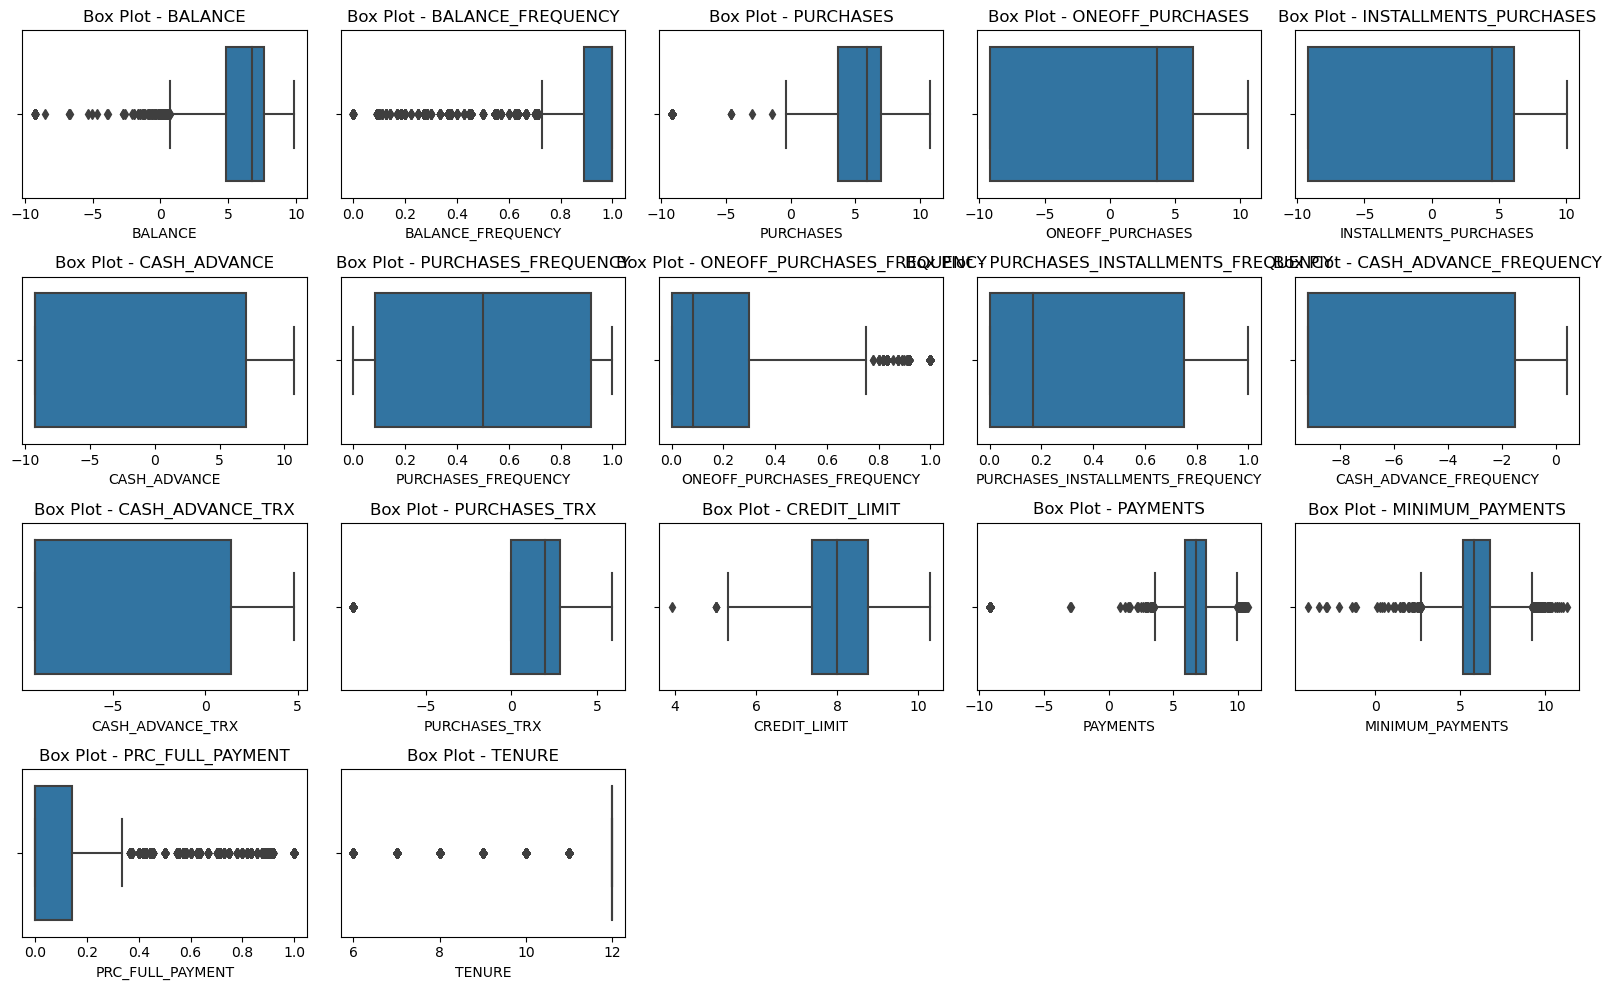

In [163]:
plt.figure(figsize=(16, 10))

for i, column in enumerate(df_log.select_dtypes(include='number').columns):
    plt.subplot(4, 5, i+1)  
    sns.boxplot(x=df_log[column])
    plt.title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

## Robust Scaling 

In [164]:
df_log_RobustScaled = df_log.copy()

In [165]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

robust_scaled_data_df = scaler.fit_transform(df_log_RobustScaled)
robust_scaled_data_df = pd.DataFrame(robust_scaled_data_df, columns=df_log_RobustScaled.columns)


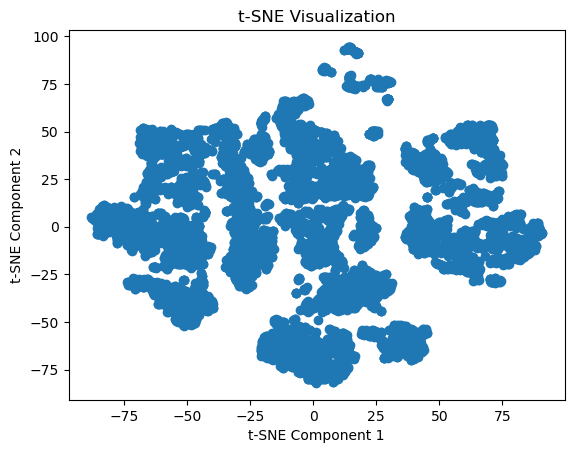

In [166]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
data_for_tsne = robust_scaled_data_df[robust_scaled_data_df.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Robust scaler is not helping

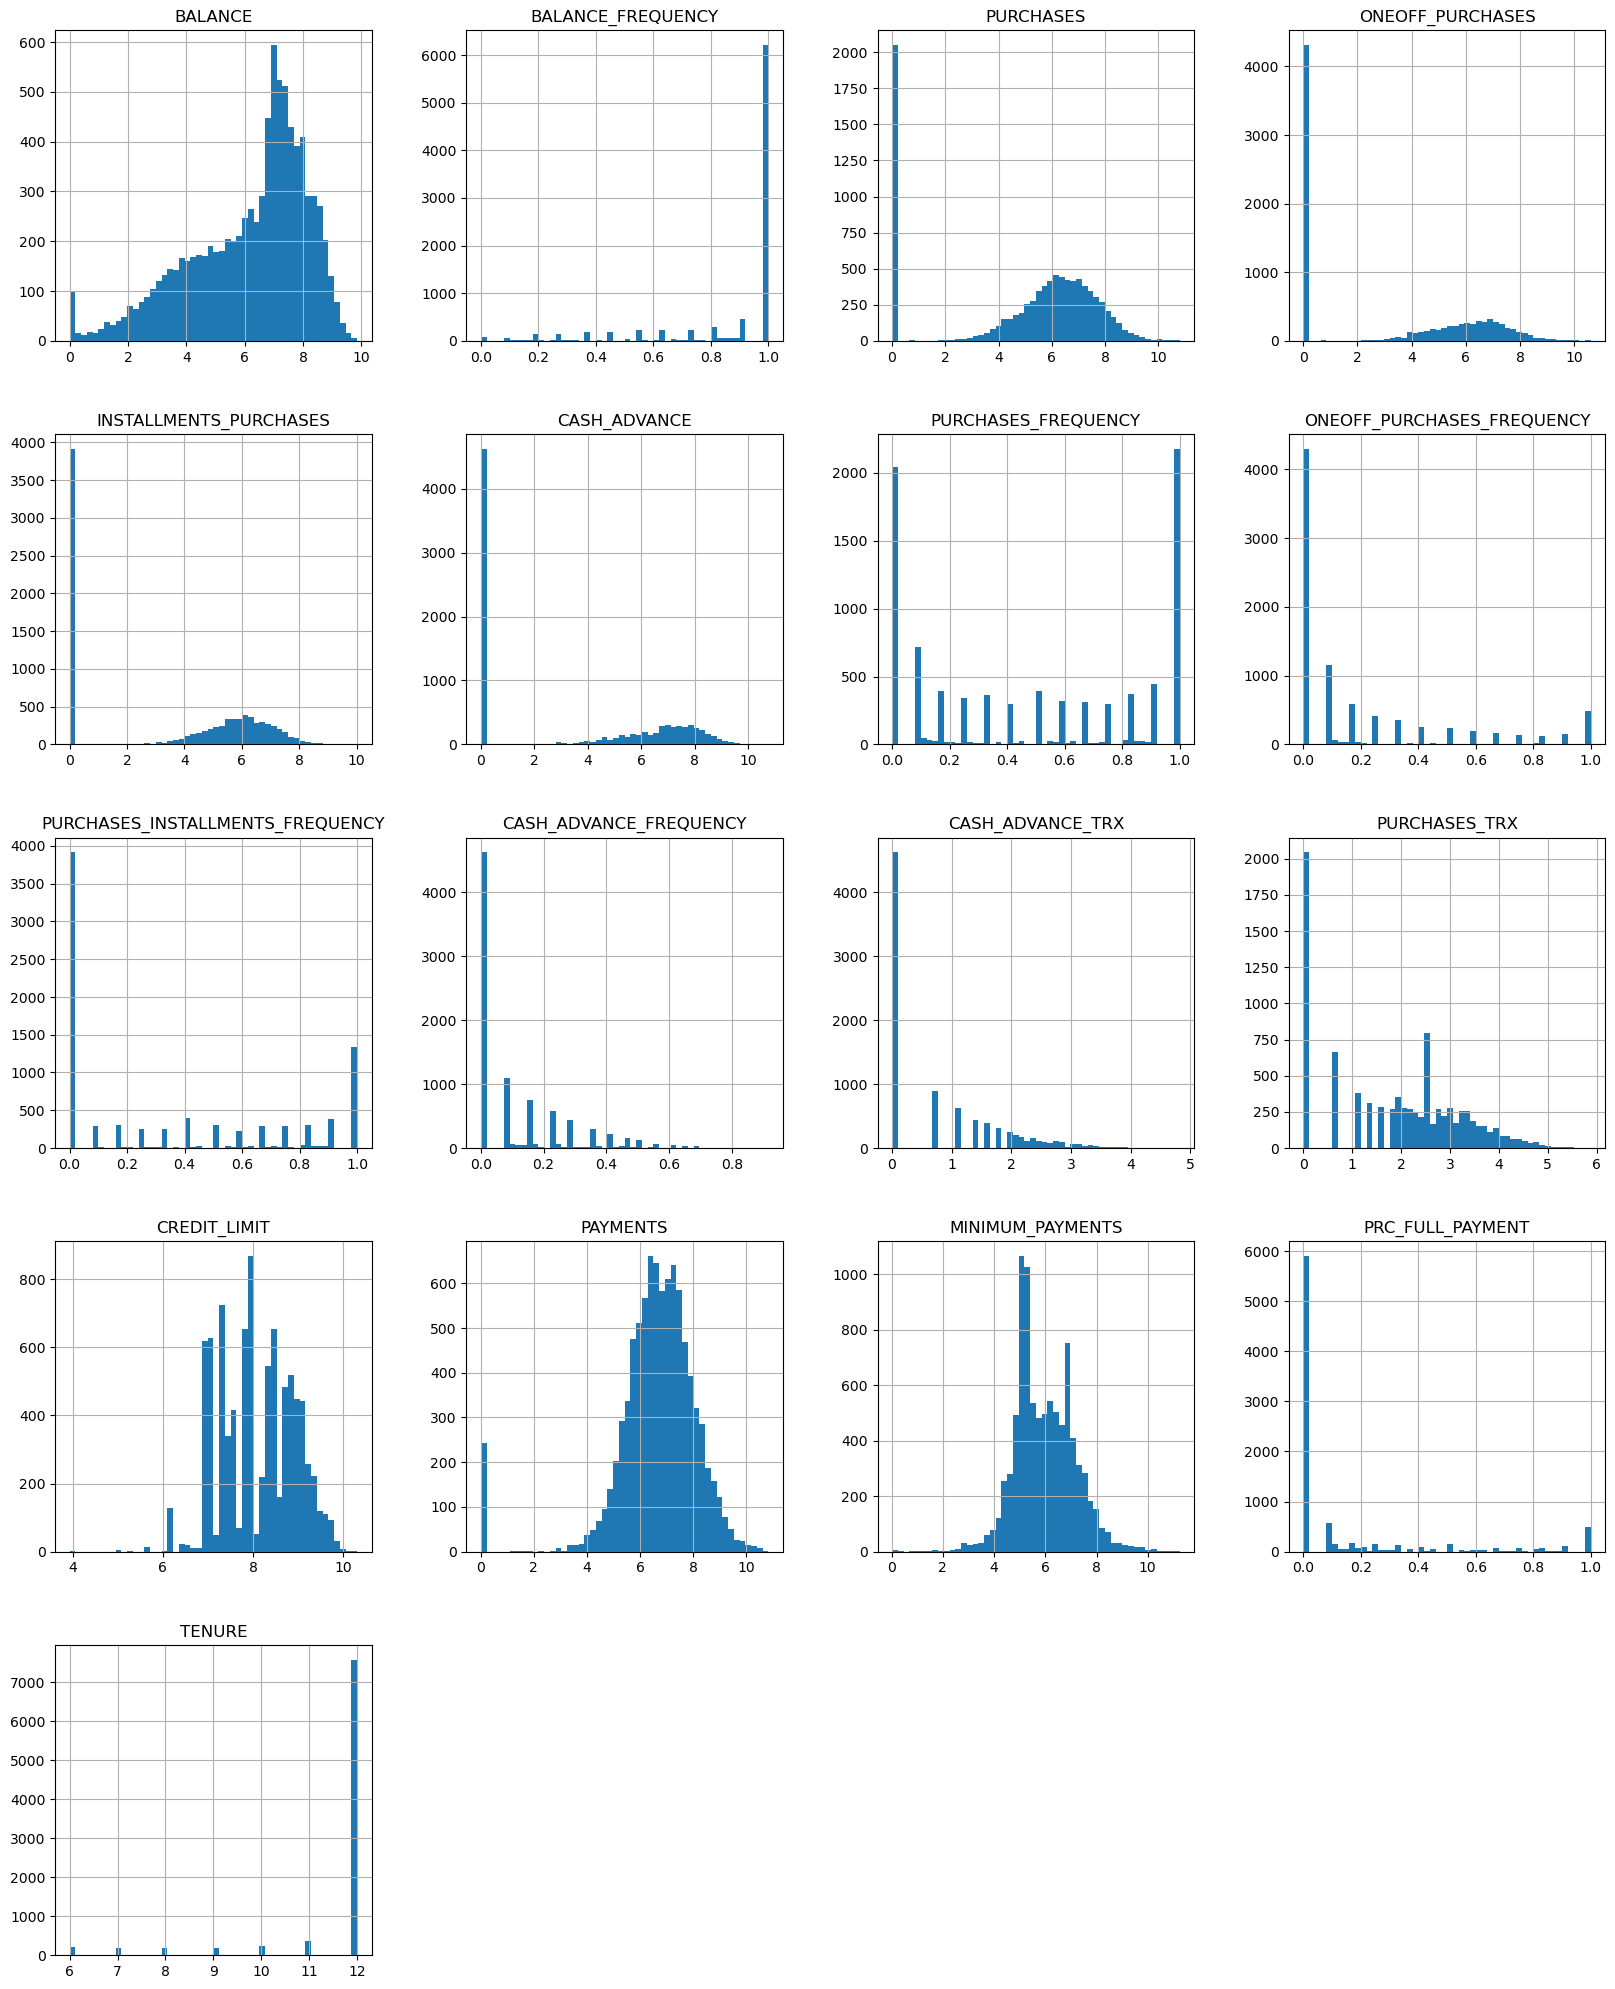

In [57]:
df_log_RobustScaled.hist(bins=50, figsize=(20, 25))
plt.show()

## Min_Max Scaler

In [171]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

minmax_scaled_data = minmax_scaler.fit_transform(df_log)

minmax_scaled_data_df = pd.DataFrame(minmax_scaled_data, columns=df_log.columns)


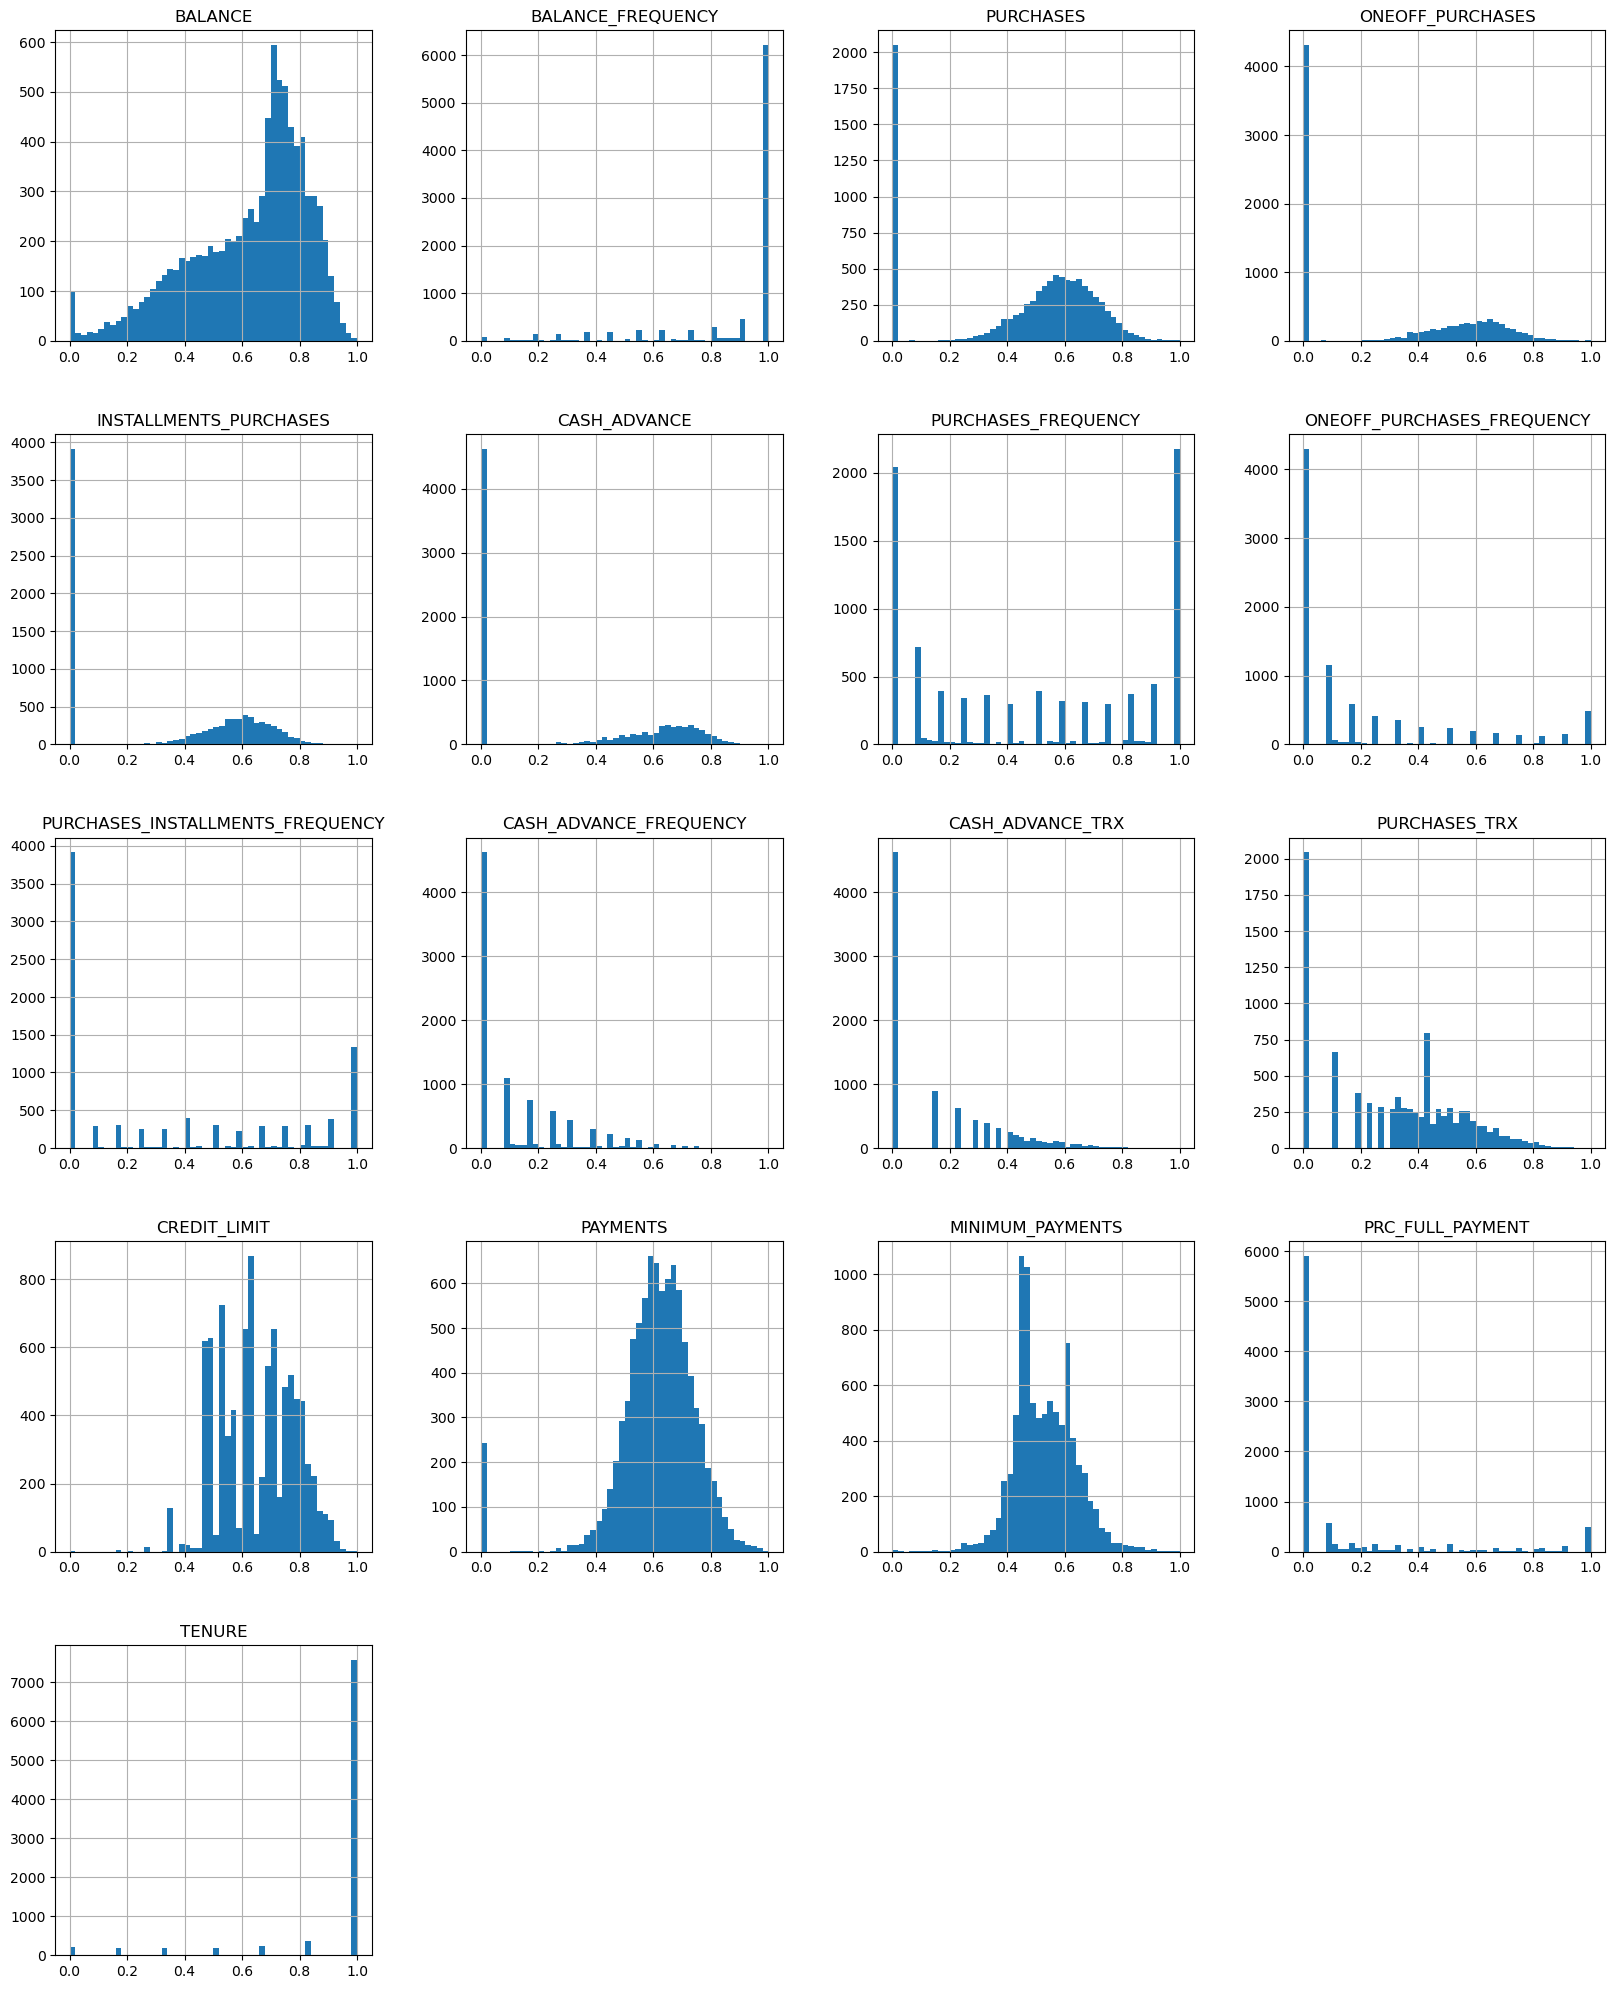

In [58]:
minmax_scaled_data_df.hist(bins=50, figsize=(20, 25))
plt.show()

  File "C:\Users\El-Masria\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\El-Masria\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\El-Masria\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\El-Masria\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


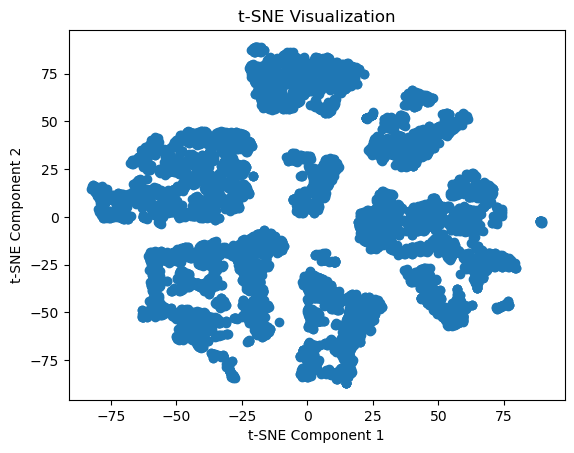

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
data_for_tsne = minmax_scaled_data_df[minmax_scaled_data_df.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

 Better results than Robust Scaler

# PCA on Min-max-scaled Data

In [16]:
df_log_RobustScaled_normalized_PCA = normalized_data.copy()

Choosing the no. of principal components:

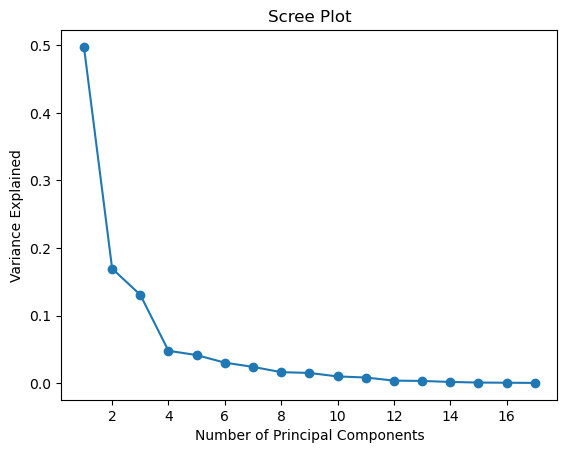

In [158]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(minmax_scaled_data_df)


# Plot the scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

optimal no. of principal components = 4 or 8, I may try both

In [173]:
n_components = 4
pca = PCA(n_components=n_components)

pca_result = pca.fit_transform(minmax_scaled_data_df)

df_PCA4 = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

In [27]:
n_components = 8
pca = PCA(n_components=n_components)

pca_result = pca.fit_transform(minmax_scaled_data_df)

df_PCA8 = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

7 looks good too

In [28]:
n_components = 7
pca = PCA(n_components=n_components)

pca_result = pca.fit_transform(minmax_scaled_data_df)

df_PCA7 = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

In [29]:
n_components = 6
pca = PCA(n_components=n_components)

pca_result = pca.fit_transform(minmax_scaled_data_df)

df_PCA6 = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

In [30]:
pca = PCA(n_components=.95)
pca_result = pca.fit_transform(minmax_scaled_data_df)

print('Explained variation summation for all components: {}'.format(sum(pca.explained_variance_ratio_)))

pca_result.shape


Explained variation summation for all components: 0.9573058717357743


(8950, 8)

8 principle components holds 95% of the information

-------------
Visualizing Data with 8, 6, 7 and 4 Principle Components:

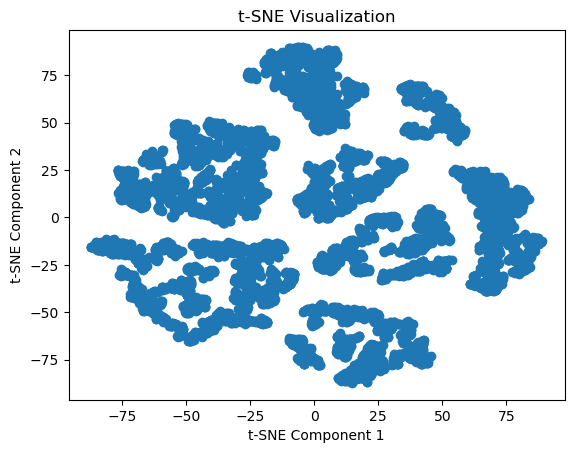

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
data_for_tsne = df_PCA8[df_PCA8.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

6:

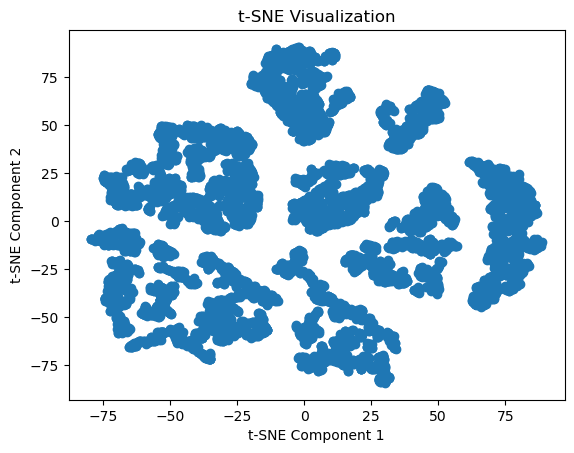

In [177]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
data_for_tsne = df_PCA6[df_PCA6.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

7:

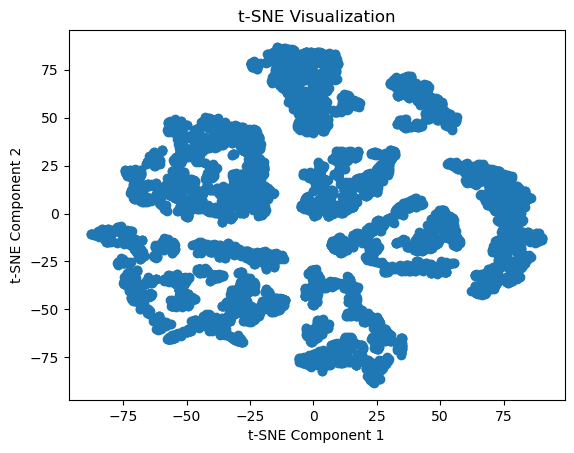

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
data_for_tsne = df_PCA7[df_PCA7.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

4:

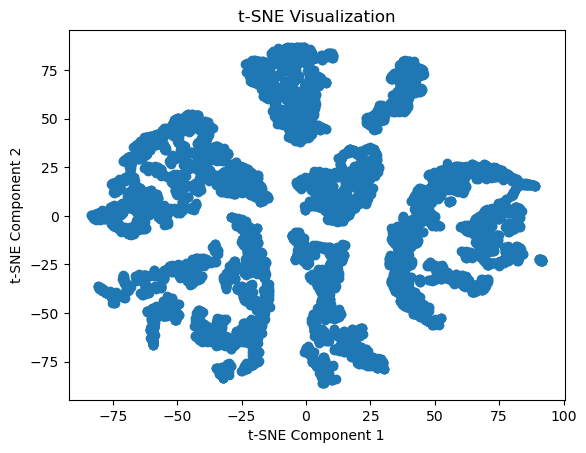

In [173]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
data_for_tsne = df_PCA4[df_PCA4.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

-----------------------------

## Preprocessing 2: (Log Transformation - PCA)

In [28]:
df_log

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.711148           0.818182   4.558079         -9.210340   
1     8.071677           0.909091  -9.210340         -9.210340   
2     7.822104           1.000000   6.650499          6.650499   
3     7.418583           0.636364   7.312553          7.312553   
4     6.706513           1.000000   2.772589          2.772589   
...        ...                ...        ...               ...   
8945  3.349677           1.000000   5.673736         -9.210340   
8946  2.954036           1.000000   5.703782         -9.210340   
8947  3.152679           0.833333   4.972587         -9.210340   
8948  2.599541           0.833333  -9.210340         -9.210340   
8949  5.920795           0.666667   6.996910          6.996910   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.558079     -9.210340             0.166667   
1                  -9.210340      8.770741             0.000000   
2                  -9.210340     -9.210340             1.000000   
3                  -9.210340      5.326847             0.083333   
4                  -9.210340     -9.210340             0.083333   
...                      ...           ...                  ...   
8945                5.673736     -9.210340             1.000000   
8946                5.703782     -9.210340             1.000000   
8947                4.972587     -9.210340             0.833333   
8948               -9.210340      3.598921             0.000000   
8949               -9.210340      4.844502             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -9.210340         -9.210340       0.693147      6.907755   
1                  -1.386294          1.386294      -9.210340      8.853665   
2                  -9.210340         -9.210340       2.484907      8.922658   
3                  -2.484911          0.000000       0.000000      8.922658   
4                  -9.210340         -9.210340       0.000000      7.090077   
...                      ...               ...            ...           ...   
8945               -9.210340         -9.210340       1.791759      6.907755   
8946               -9.210340         -9.210340       1.791759      6.907755   
8947               -9.210340         -9.210340       1.609438      6.907755   
8948               -1.791757          0.693147      -9.210340      6.214608   
8949               -1.098613          0.693147       3.135494      7.090077   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     5.307287          4.938135          0.000000      12  
1     8.319482          6.977599          0.222222      12  
2     6.433047          6.441401          0.000000      12  
3    -9.210340          6.761812          0.000000      12  
4     6.519641          5.500406          0.000000      12  
...        ...               ...               ...     ...  
8945  5.785653          3.889499          0.500000       6  
8946  5.619898          6.761812          0.000000       6  
8947  4.397786          4.411808          0.250000       6  
8948  3.9

In [132]:
df_log_PCA = df_log.copy()

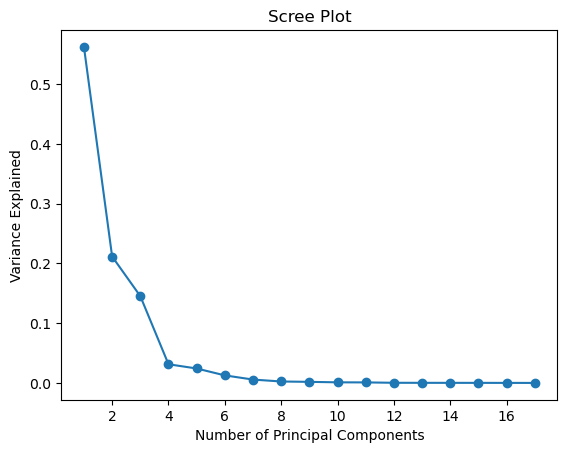

In [133]:
pca = PCA()
pca.fit(df_log_PCA)

# Plot the scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

In [176]:
n_components = 4
pca = PCA(n_components=n_components)

pca_result4 = pca.fit_transform(df_log_PCA)


df_log_PCA24 = pd.DataFrame(data=pca_result4, columns=[f'PC{i+1}' for i in range(n_components)])

In [36]:
n_components = 8
pca = PCA(n_components=n_components)

pca_result4 = pca.fit_transform(df_log_PCA)

df_log_PCA28 = pd.DataFrame(data=pca_result4, columns=[f'PC{i+1}' for i in range(n_components)])

In [37]:
n_components = 7
pca = PCA(n_components=n_components)

pca_result4 = pca.fit_transform(df_log_PCA)

df_log_PCA27 = pd.DataFrame(data=pca_result4, columns=[f'PC{i+1}' for i in range(n_components)])

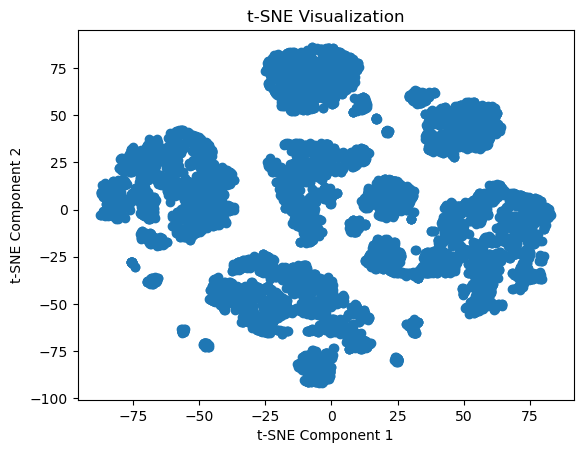

In [40]:
from sklearn.manifold import TSNE
data_for_tsne = df_log_PCA27[df_log_PCA27.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

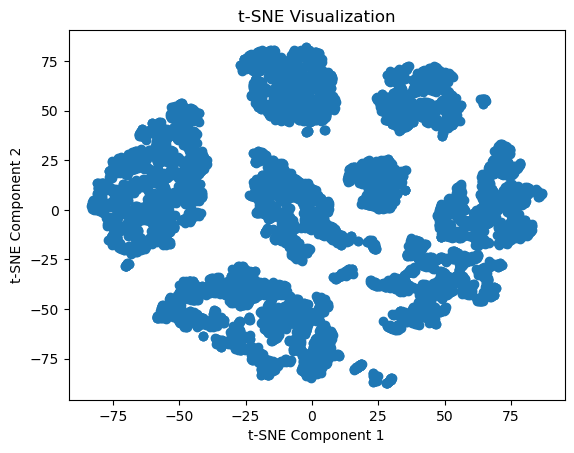

In [38]:
from sklearn.manifold import TSNE
data_for_tsne = df_log_PCA24[df_log_PCA24.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

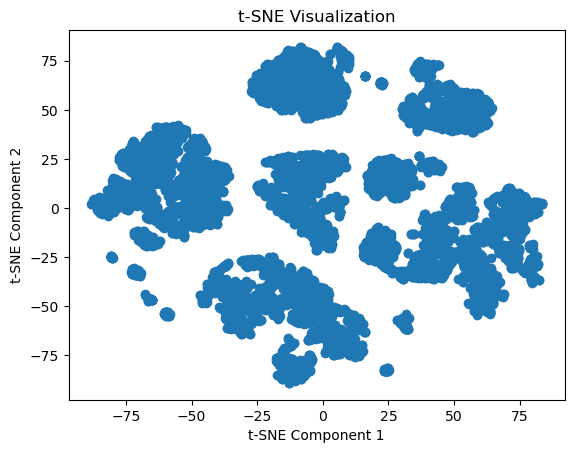

In [38]:
from sklearn.manifold import TSNE
data_for_tsne = df_log_PCA28[df_log_PCA28.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

minmax_scaled_data = minmax_scaler.fit_transform(df_log_PCA27)

minmax_scaled_data_df2 = pd.DataFrame(minmax_scaled_data, columns=df_log_PCA27.columns)


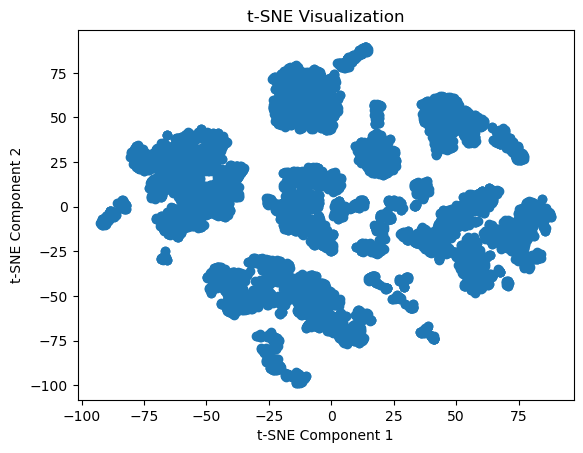

In [43]:
data_for_tsne = minmax_scaled_data_df2[minmax_scaled_data_df2.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [233]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

minmax_scaled_data = minmax_scaler.fit_transform(df_log_PCA24)

minmax_scaled_data_df3 = pd.DataFrame(minmax_scaled_data, columns=df_log_PCA24.columns)

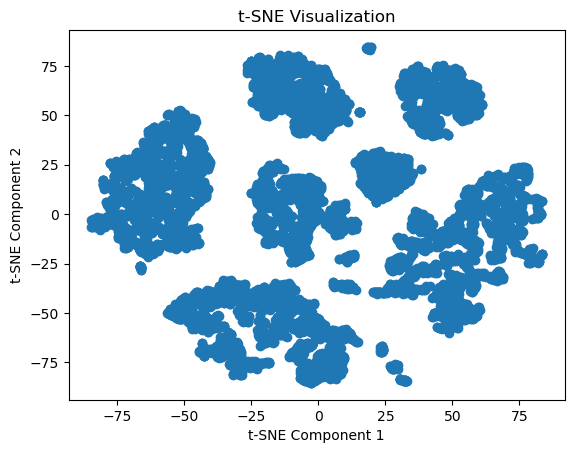

In [235]:
data_for_tsne = minmax_scaled_data_df3[minmax_scaled_data_df3.columns]

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

This shows better results

## Preprocessing 3: (Min-Max Scaler - PCA)

In [236]:
df_copy

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

In [237]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

minmax_scaled_data = minmax_scaler.fit_transform(df_copy)

minmax_scaled_data_df22 = pd.DataFrame(minmax_scaled_data, columns=df_log.columns)

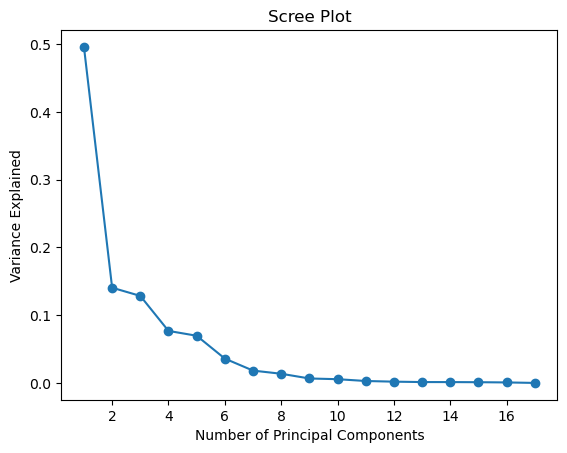

In [238]:
pca = PCA()
pca.fit(minmax_scaled_data_df22)

# Plot the scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

In [47]:
n_components = 7
pca = PCA(n_components=n_components)

pca_result4 = pca.fit_transform(df_copy_all)

df_log_PCA2_7 = pd.DataFrame(data=pca_result4, columns=[f'PC{i+1}' for i in range(n_components)])

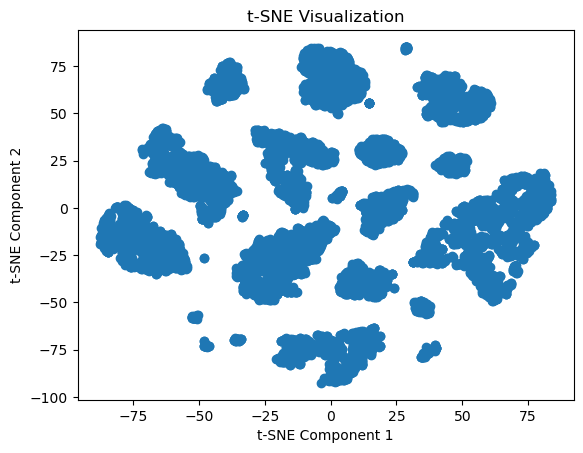

In [48]:
tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(df_log_PCA2_7)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

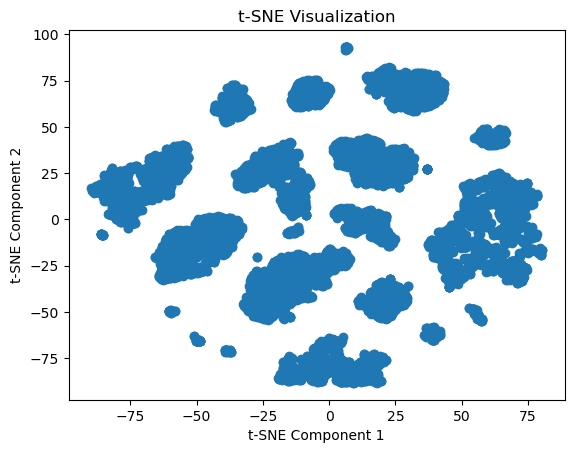

In [49]:
n_components = 8
pca = PCA(n_components=n_components)

pca_result4 = pca.fit_transform(df_copy_all)

df_log_PCA2_8 = pd.DataFrame(data=pca_result4, columns=[f'PC{i+1}' for i in range(n_components)])

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(df_log_PCA2_8)

tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Too much of clusters


## K means

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

In [53]:
from sklearn.cluster import KMeans

# K means on Data Processed by the first approch: Log Transformation - Min-Max - PCA(8)

## Elbow Nethod

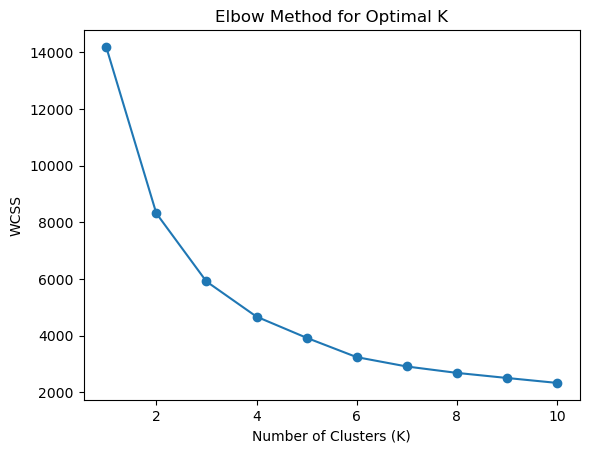

PC1        PC2        PC3       PC4       PC5        PC6  \
0     -6.618875 -12.825783  -0.047012  4.300954  1.092422  -0.790756   
1     23.690747  -2.923759  -0.310051 -6.950596 -1.843693  -0.826782   
2     -7.373016   6.777025 -14.098959  2.927978  1.739155  -3.298166   
3      4.892751  13.744998  -4.130021  6.227002  8.324231  10.519092   
4     -2.919032   1.689531 -14.230501  2.540483  0.172719  -2.478946   
...         ...        ...        ...       ...       ...        ...   
8945  -9.533852 -13.638597   1.997978 -3.626833  2.935890   0.130062   
8946  -8.836544 -12.857475   1.979708  4.628217  1.731978  -0.973660   
8947  -8.741598 -13.673802   1.251863 -2.623198  3.061087   1.196720   
8948  20.769003  -6.159454  -3.939194 -6.280705  0.058844   4.929992   
8949   3.380802  15.479659  -2.746046  2.109124  6.884806   0.988036   

           PC7       PC8  
0     1.248298  0.959257  
1    -1.639079 -1.380772  
2    -1.350710 -0.373408  
3    -7.935813 -0.100545  
4    -0.240985  0.829568  
...        ...       ...  
8945 -0.300720  1.451948  
8946  1.488103 -0.247631  
8947 -0.746107  1.077104  
8948  0.683611  1.708276  
8949  0.541466  2.126172  

[8950 rows x 8 columns]

In [54]:
wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(df_PCA8)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


We may try k=2 and k=5 to see which is better

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.033s...
[t-SNE] Computed neighbors for 8950 samples in 0.551s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.044793
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.052597
[t-SNE] KL divergence after 1000 iterations: 0.726439


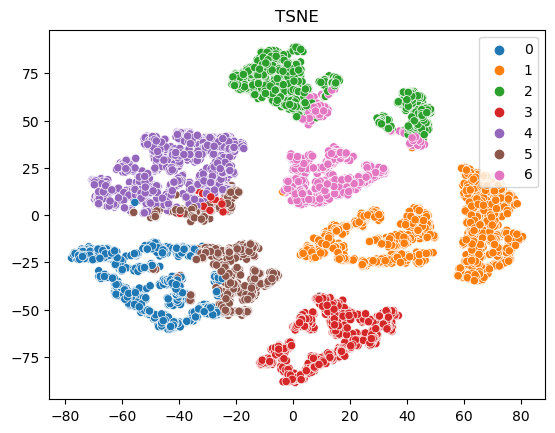

In [55]:
from sklearn.manifold import TSNE
kmeans = KMeans(n_clusters=7, init="k-means++")
kmeans = kmeans.fit(df_PCA8)

Clusters = kmeans.labels_

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(df_PCA8)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

sns.scatterplot(
x=tsne_2d_one, y=tsne_2d_two,
legend="full",
hue=Clusters,
palette='tab10'
)
plt.title("TSNE");


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.039s...
[t-SNE] Computed neighbors for 8950 samples in 0.677s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.044793
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.052597
[t-SNE] KL divergence after 500 iterations: 0.961193


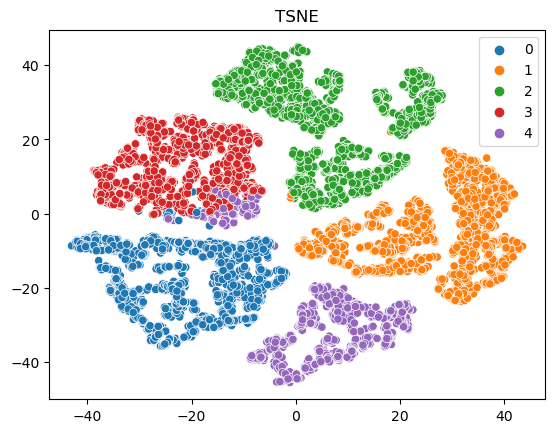

In [56]:
kmeans = KMeans(n_clusters=5, init="k-means++")
kmeans = kmeans.fit(df_PCA8)

Clusters = kmeans.labels_


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(df_PCA8)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

sns.scatterplot(
x=tsne_2d_one, y=tsne_2d_two,
legend="full",
hue=Clusters,
palette='tab10'
)
plt.title("TSNE");

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.030s...
[t-SNE] Computed neighbors for 8950 samples in 0.464s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.044793
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.052597
[t-SNE] KL divergence after 500 iterations: 0.961193


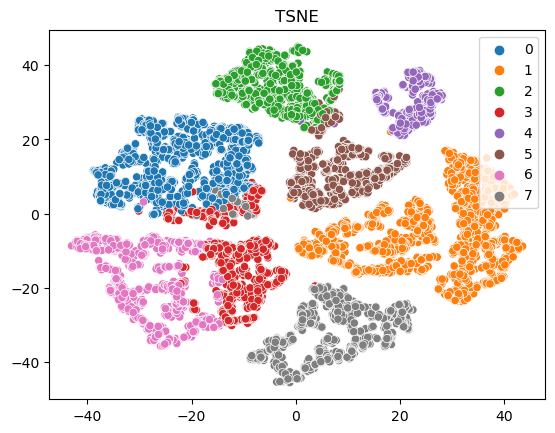

In [262]:
kmeans = KMeans(n_clusters=8, init="k-means++")
kmeans = kmeans.fit(df_PCA8)

Clusters = kmeans.labels_


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(df_PCA8)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

sns.scatterplot(
x=tsne_2d_one, y=tsne_2d_two,
legend="full",
hue=Clusters,
palette='tab10'
)
plt.title("TSNE");

In [263]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=8, random_state=42, n_init = 'auto')
label =  kmeans.fit_predict(df_PCA8)
df_copy['label'] = label
silhouette_score(df_PCA8, label)

0.4306395776556083

# PCA (4)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.016s...
[t-SNE] Computed neighbors for 8950 samples in 0.287s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.023744
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.481293
[t-SNE] KL divergence after 500 iterations: 0.919633


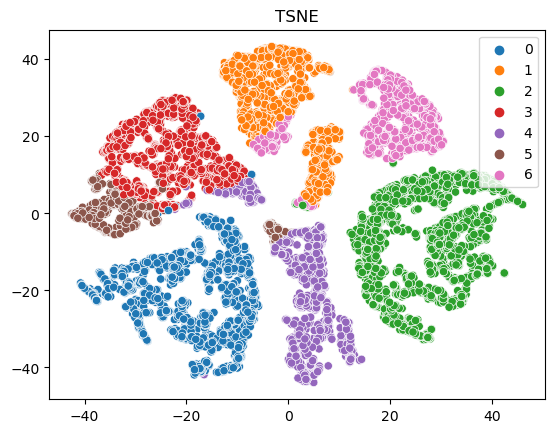

In [265]:
kmeans = KMeans(n_clusters=7, init="k-means++")
Clusters = kmeans.fit_predict(df_PCA4)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(df_PCA4)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]


sns.scatterplot(
x=tsne_2d_one, y=tsne_2d_two,
legend="full",
hue=Clusters,
palette='tab10'
)
plt.title("TSNE");

In [266]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=8, random_state=42, n_init = 'auto')
label =  kmeans.fit_predict(df_PCA4)
df_copy['label'] = label
silhouette_score(df_PCA4, label)

0.52716538432263

--------------

# K means on data preprocessed by the 3rd approach: Min-Max Scaler - PCA

# Determining No. of Clusters using Elbow Method:

PCA: 8

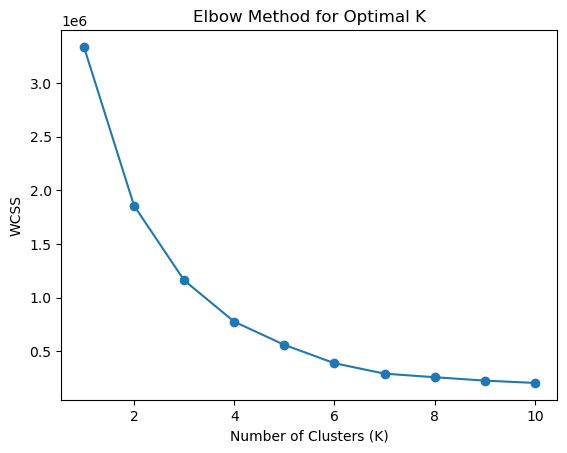

In [59]:
wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(df_log_PCA2_8)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.039s...
[t-SNE] Computed neighbors for 8950 samples in 0.545s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.656523
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.117027
[t-SNE] KL divergence after 500 iterations: 1.089234


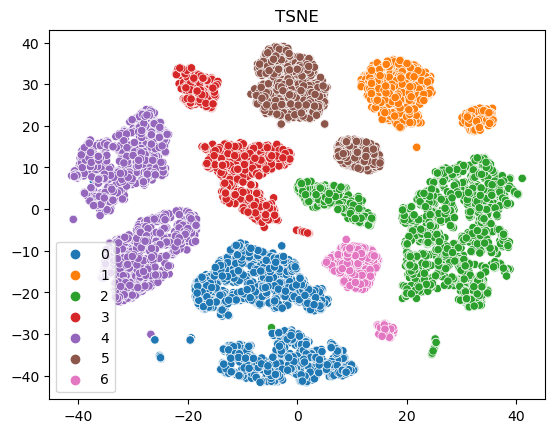

In [60]:
kmeans = KMeans(n_clusters=7, init="k-means++")
Clusters = kmeans.fit_predict(df_log_PCA2_8)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(df_log_PCA2_8)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

sns.scatterplot(
x=tsne_2d_one, y=tsne_2d_two,
legend="full",
hue=Clusters,
palette='tab10'
)
plt.title("TSNE");

----------------

# K means on data preprocessed by the 2nd approach:Log Transformation - PCA

# Determining No. of Clusters using Elbow Method:

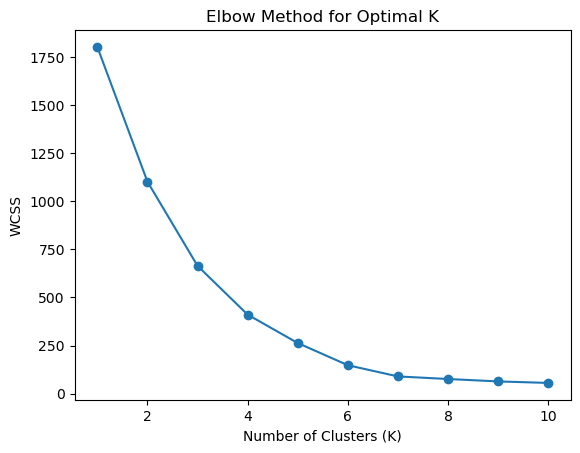

In [248]:
wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(minmax_scaled_data_df3)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.018s...
[t-SNE] Computed neighbors for 8950 samples in 0.282s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.009217
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.244392
[t-SNE] KL divergence after 500 iterations: 1.025248


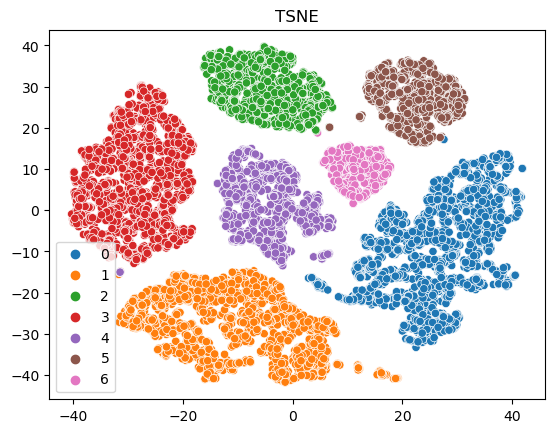

In [242]:
kmeans = KMeans(n_clusters=7, init="k-means++")
Clusters = kmeans.fit_predict(minmax_scaled_data_df3)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(minmax_scaled_data_df3)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

sns.scatterplot(
x=tsne_2d_one, y=tsne_2d_two,
legend="full",
hue=Clusters,
palette='tab10'
)
plt.title("TSNE");

In [251]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=7, random_state=42, n_init = 'auto')
label =  kmeans.fit_predict(minmax_scaled_data_df3)
df_copy['label'] = label
silhouette_score(minmax_scaled_data_df3, label)

0.7830759245741639

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.017s...
[t-SNE] Computed neighbors for 8950 samples in 0.290s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.281377
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.712379
[t-SNE] KL divergence after 500 iterations: 0.993797


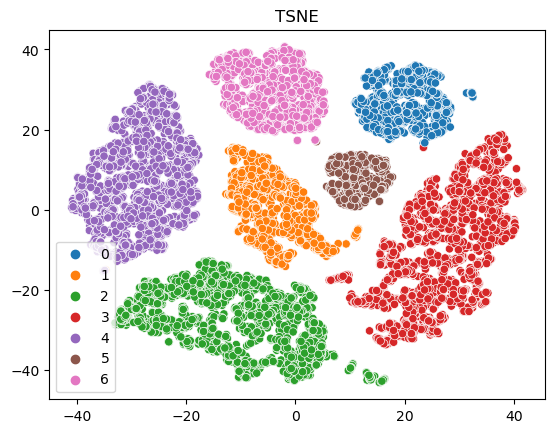

In [252]:
kmeans = KMeans(n_clusters=7, init="k-means++")
Clusters = kmeans.fit_predict(df_log_PCA24)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(df_log_PCA24)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

sns.scatterplot(
x=tsne_2d_one, y=tsne_2d_two,
legend="full",
hue=Clusters,
palette='tab10'
)
plt.title("TSNE");

In [253]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=7, random_state=42, n_init = 'auto')
label =  kmeans.fit_predict(df_log_PCA24)
df_copy['label'] = label
silhouette_score(df_log_PCA24, label)

0.7983910775244543

Higher score is shown without Min-Max scaler (only log transformation and PCA)

# Agglomerative Clustering

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.010s...
[t-SNE] Computed neighbors for 8950 samples in 0.243s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.281377
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.712379
[t-SNE] KL divergence after 500 iterations: 0.993797


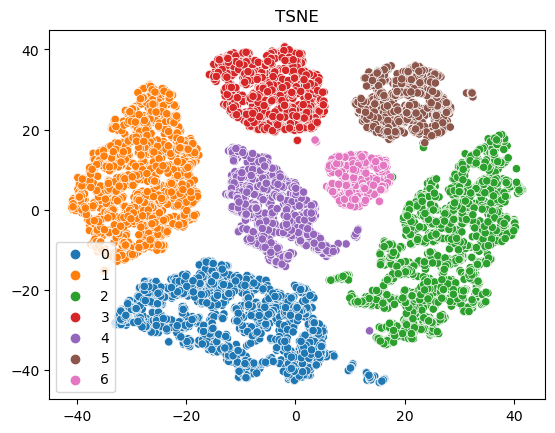

In [250]:
# training:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=7).fit(df_log_PCA24)
Clusters = clustering.labels_

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(df_log_PCA24)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

sns.scatterplot(
x=tsne_2d_one, y=tsne_2d_two,
legend="full",
hue=Clusters,
palette='tab10'
)
plt.title("TSNE");

This shows that the data can be clustered into 7 clusters

## DBSCAN

In [63]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=500)
labels = dbscan.fit_predict(df_log_PCA24)
labels

array([0, 1, 2, ..., 0, 1, 5], dtype=int64)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.014s...
[t-SNE] Computed neighbors for 8950 samples in 0.299s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.281377
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.711426
[t-SNE] KL divergence after 500 iterations: 0.993849


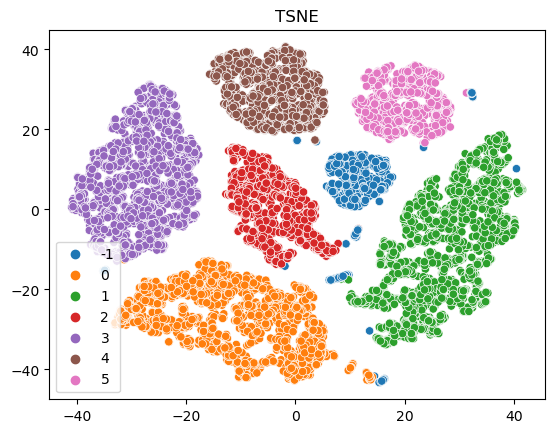

In [64]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(df_log_PCA24)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

sns.scatterplot(
x=tsne_2d_one, y=tsne_2d_two,
legend="full",
hue=labels,
palette='tab10'
)
plt.title("TSNE");

7 clusters with DBSCAN when setting epsilon=5

In [258]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=7, random_state=42, n_init = 'auto')
label =  kmeans.fit_predict(df_log_PCA24)
df_copy['label'] = label
silhouette_score(df_log_PCA24, label)

0.7983910775244543

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

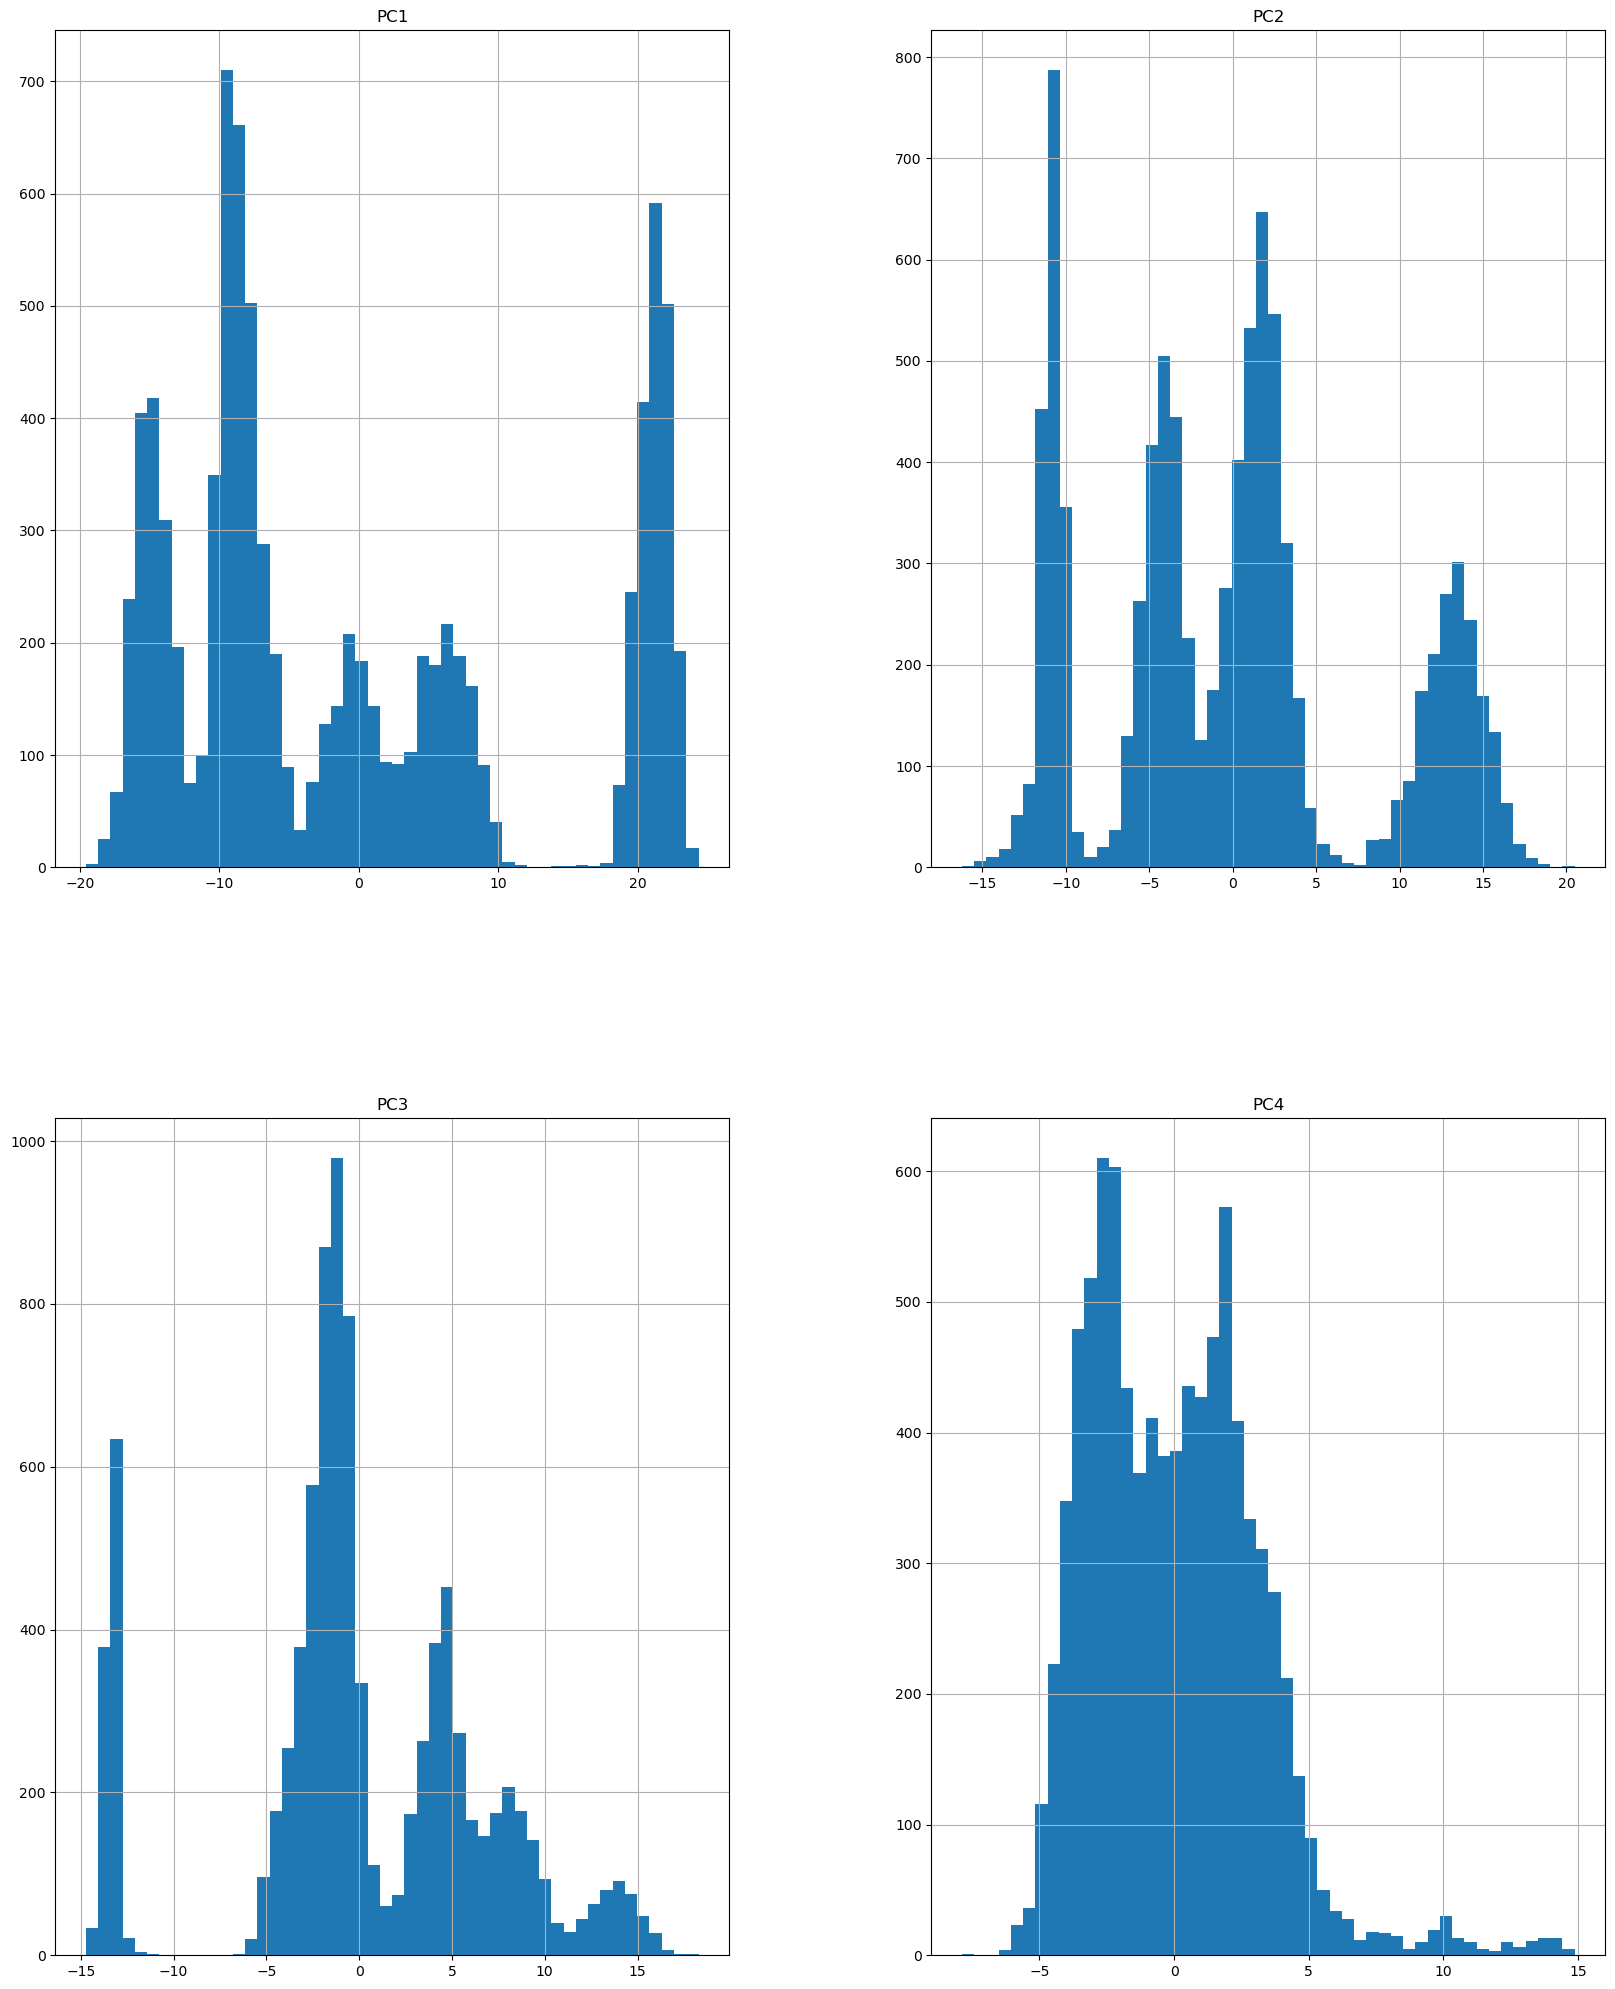

In [77]:
df_log_PCA24.hist(bins=50, figsize=(20, 25))
plt.show()

In [125]:
df_log_PCA24


array([[-7.33898809, -7.72995396],
       [-7.74004056, -7.26466514],
       [-1.68665271,  7.79344248],
       [ 4.42219763,  3.07194654],
       [-8.91775173, -7.8881959 ],
       [ 5.49753846,  1.81323115],
       [-2.3360167 ,  9.39960351],
       [ 5.05281029,  1.40944513],
       [-2.98837186,  8.82862715],
       [-3.70050112,  9.67083974],
       [-3.11090424, 10.86656431],
       [ 4.99689432,  1.28026009],
       [-2.30033403,  7.054616  ],
       [-3.92456837,  8.59364081],
       [-7.53026976, -7.36723498],
       [-3.21125072,  8.68662398],
       [-8.50716963, -6.83202465],
       [ 2.61473625,  2.159624  ],
       [-2.41212007,  9.98293112],
       [-1.92234053, 11.20474175],
       [-1.35060204,  8.19360381],
       [-2.67048333,  9.41833699],
       [ 5.61499857,  1.8261123 ],
       [-6.99195524, -7.10107919],
       [-2.97261532,  8.54855637],
       [-6.34982301, -5.43854097],
       [-7.45639852, -6.12471837],
       [ 3.82165815,  4.06555696],
       [ 4.62763206,

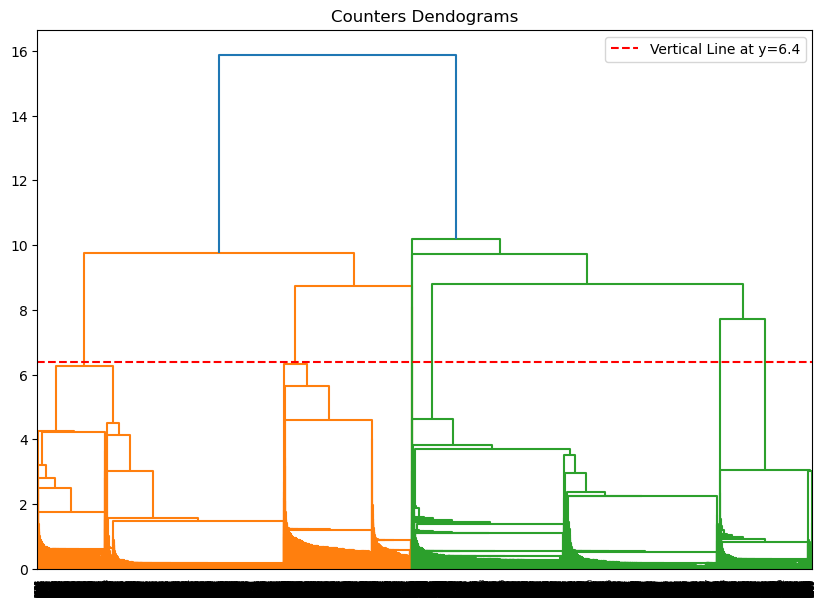

In [109]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_log_PCA24 , method='single',metric='euclidean')) #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function
plt.axhline(y=6.4, linestyle='--', color='red', label='Vertical Line at y=6.4')


# Show the legend
plt.legend()

plt.show()

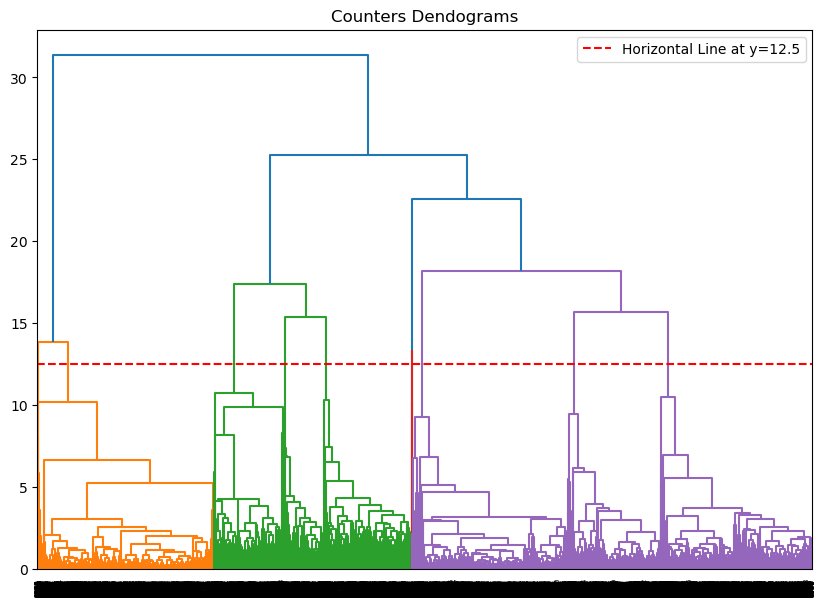

In [107]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_log_PCA24 , method='average',metric='euclidean'))

plt.axhline(y=12.5, linestyle='--', color='red', label='Horizontal Line at y=12.5')


# Show the legend
plt.legend()

plt.show()

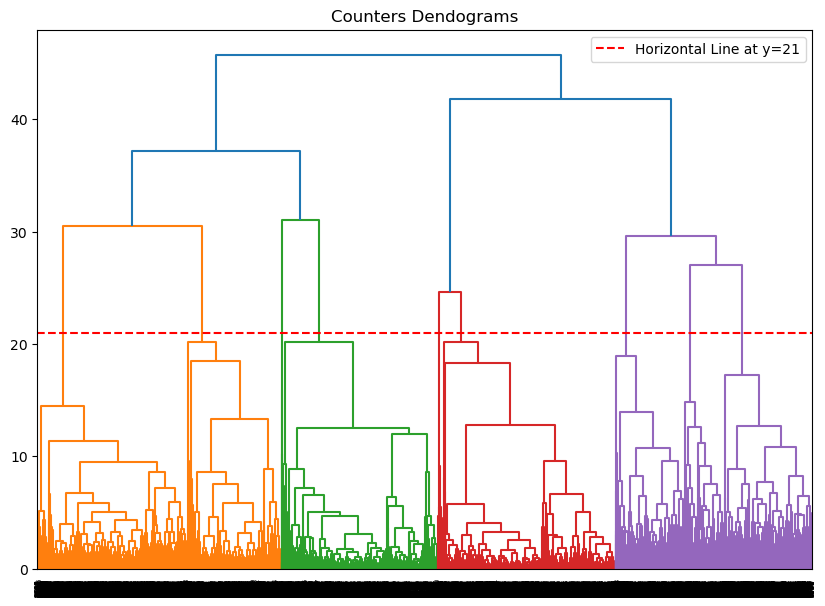

In [105]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_log_PCA24 , method='complete',metric='euclidean'))

plt.axhline(y=21, linestyle='--', color='red', label='Horizontal Line at y=21')


# Show the legend
plt.legend()

plt.show()

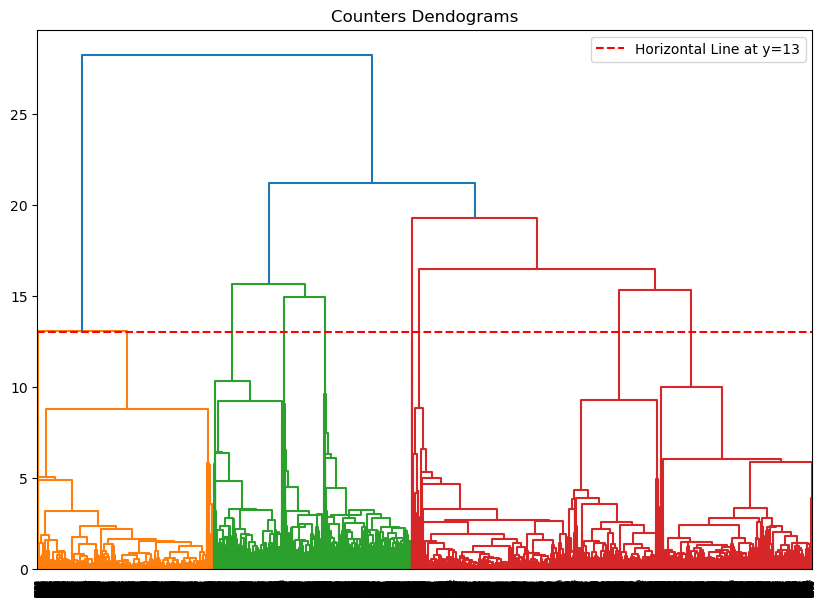

In [106]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_log_PCA24 , method='centroid',metric='euclidean'))

plt.axhline(y=13, linestyle='--', color='red', label='Horizontal Line at y=13')


# Show the legend
plt.legend()

plt.show()

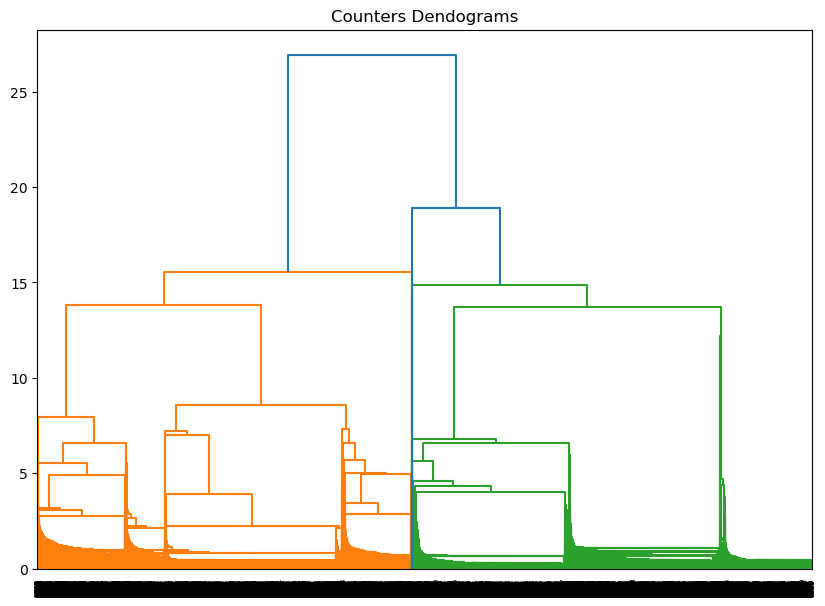

In [56]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_log_PCA24 , method='single',metric='cityblock'))

clusters are overlapping

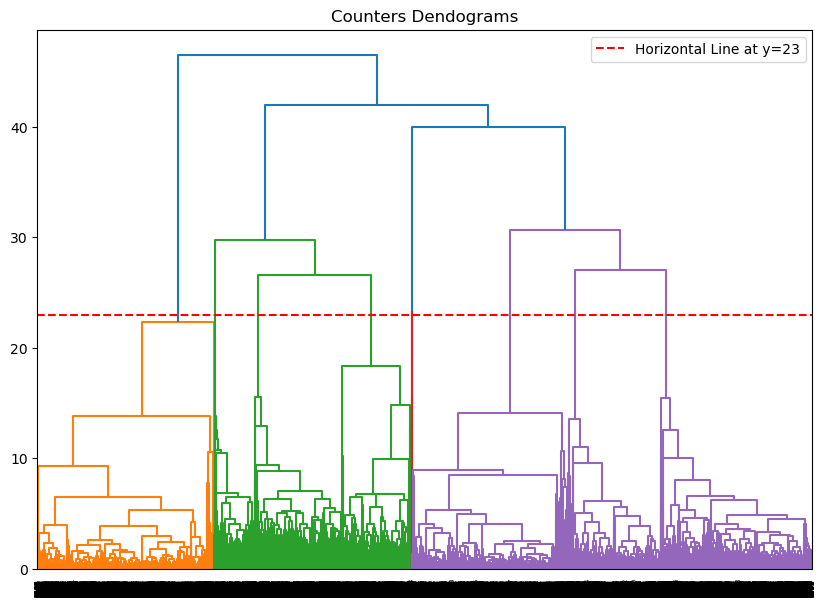

In [103]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_log_PCA24 , method='average',metric='cityblock'))

plt.axhline(y=23, linestyle='--', color='red', label='Horizontal Line at y=23')


# Show the legend
plt.legend()

plt.show()

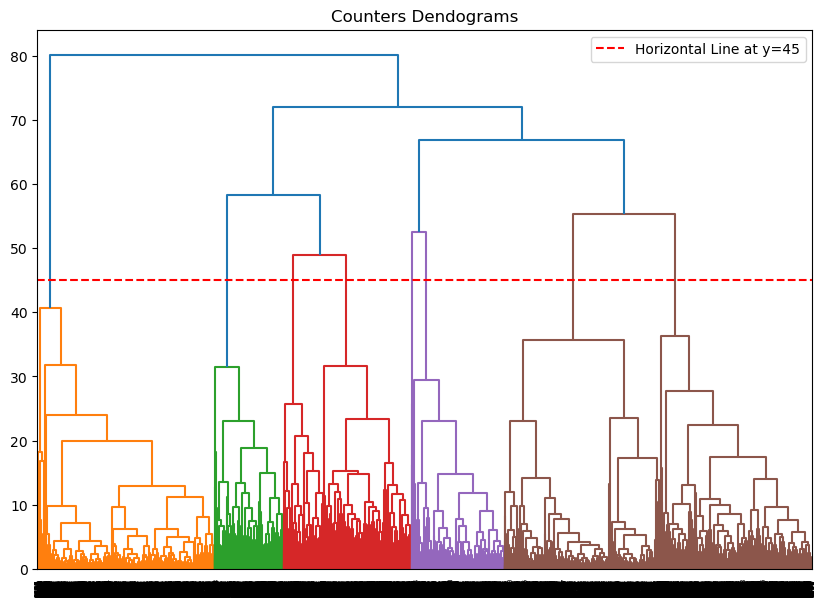

In [102]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_log_PCA24 , method='complete',metric='cityblock'))

plt.axhline(y=45, linestyle='--', color='red', label='Horizontal Line at y=45')


# Show the legend
plt.legend()

plt.show()

ValueError: Method 'centroid' requires the distance metric to be Euclidean

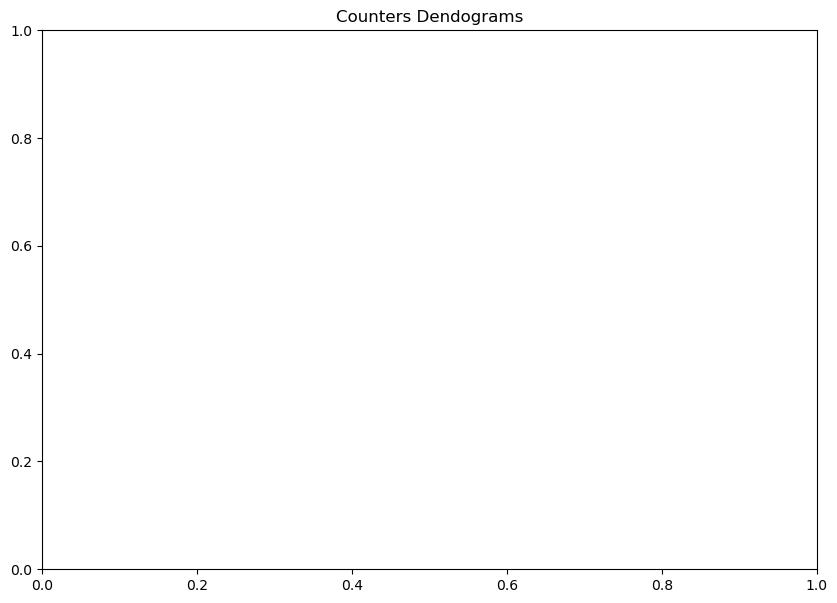

In [60]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_log_PCA24 , method='centroid',metric='cityblock'))

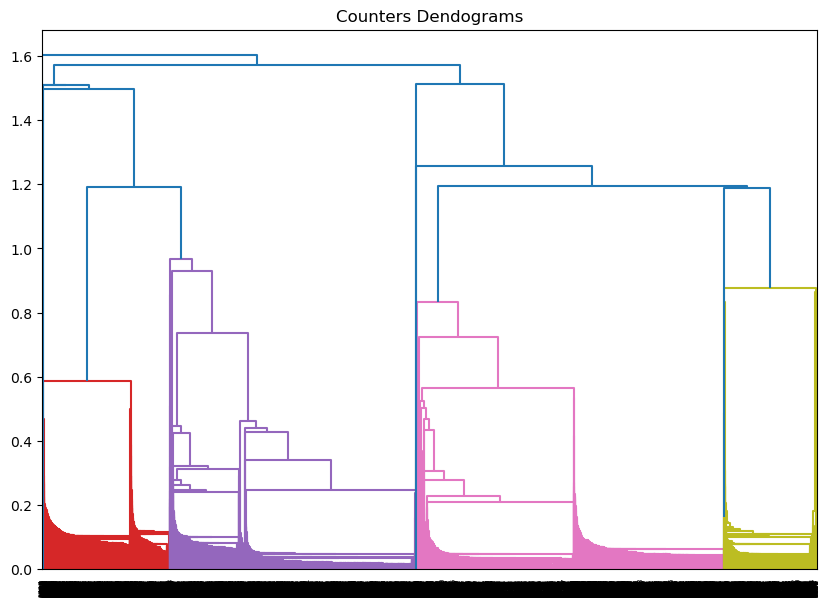

In [65]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_log_PCA24 , method='single',metric='Mahalanobis'))

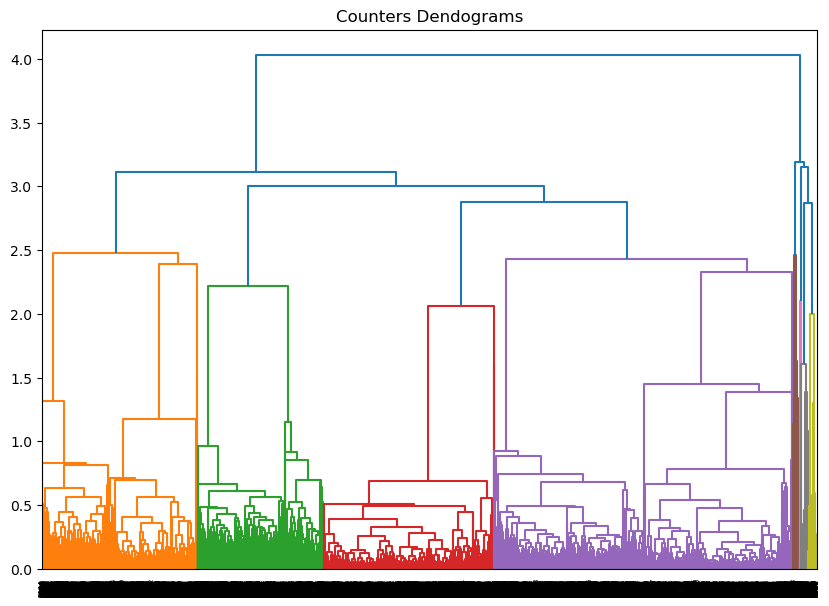

In [66]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_log_PCA24 , method='average',metric='Mahalanobis'))

No. of clustered cannot be figured out from dendograms using single/average method and metric to be Mahalanobis

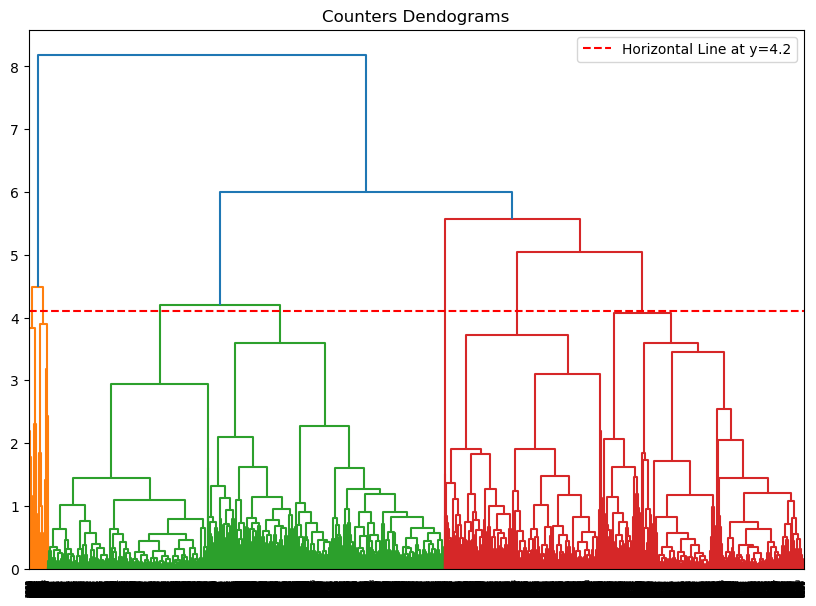

In [101]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_log_PCA24 , method='complete',metric='Mahalanobis'))

plt.axhline(y=4.1, linestyle='--', color='red', label='Horizontal Line at y=4.2')


# Show the legend
plt.legend()

plt.show()

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_log_PCA24 , method='centroid',metric='Mahalanobis'))

# Clusters Analysis

In [268]:
final_df2 = pd.concat([df_copy, pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1)

In [230]:
final_df2

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        2  
2      622.066742        627.284787          0.000000      12        3  
3        0.000000        864.206542          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        3  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        1  
89

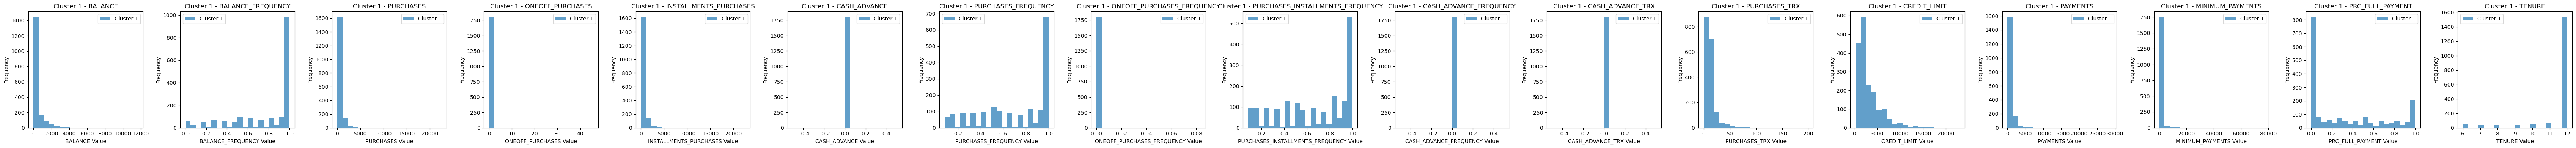

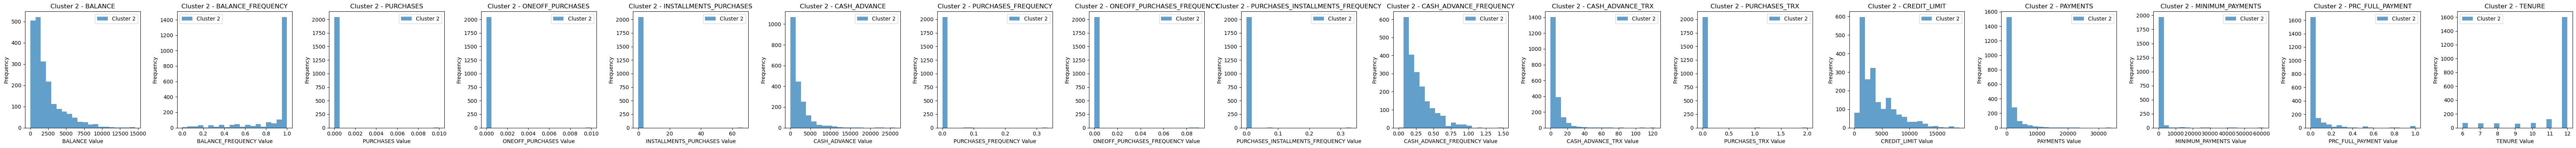

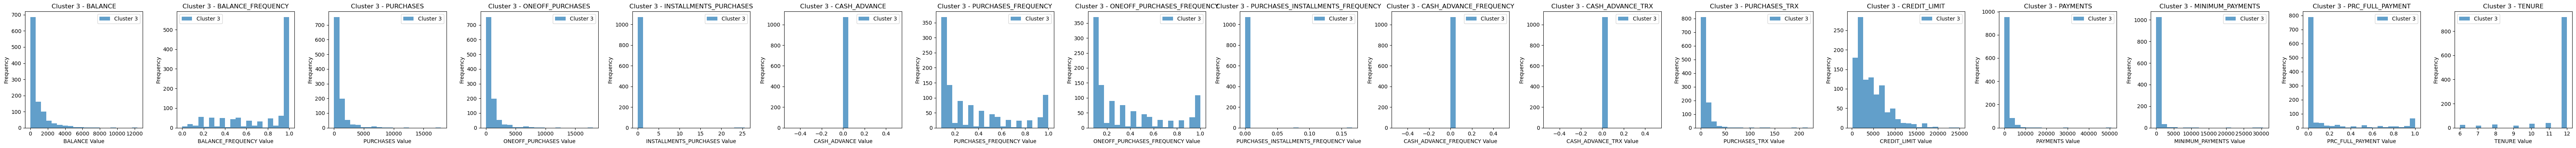

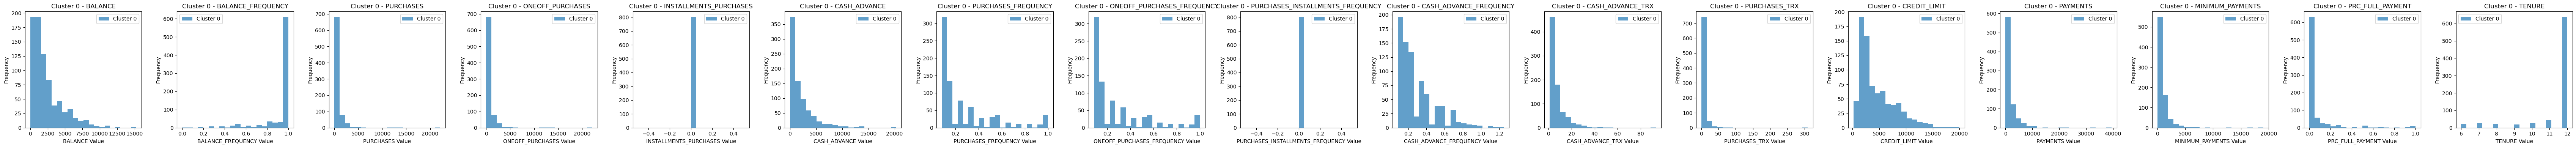

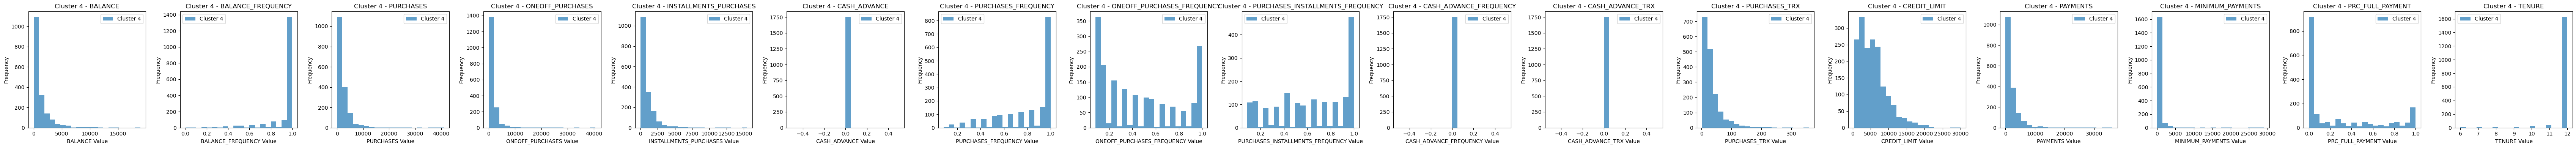

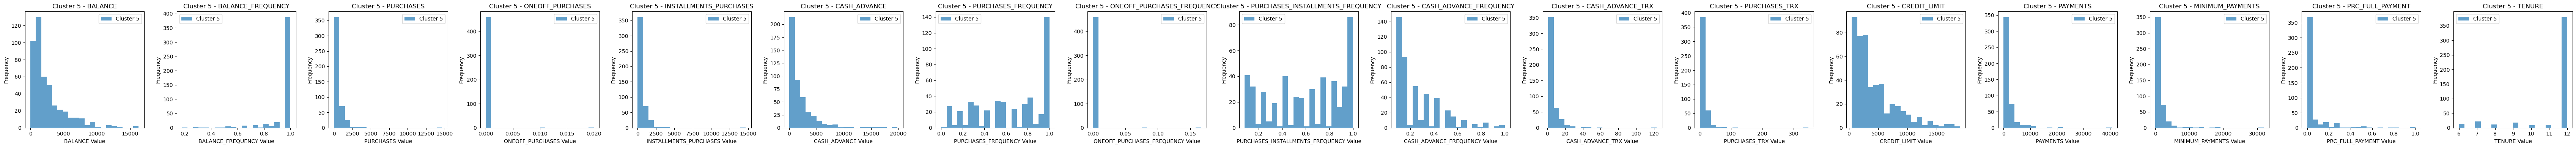

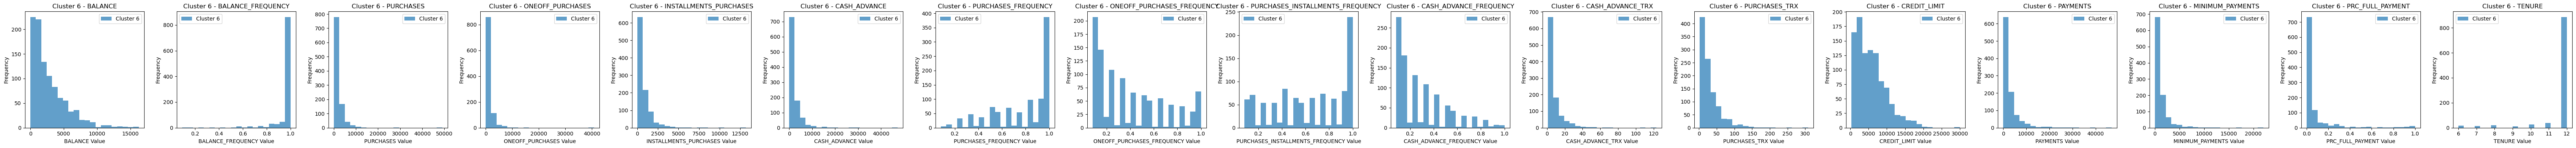

In [231]:
for cluster in final_df2['cluster'].unique():
    cluster_data = final_df2[final_df2['cluster'] == cluster]
    
    # Create a single row of subplots for each feature
    _, axes = plt.subplots(1, len(final_df2.columns[:len(final_df2.columns)-1]), figsize=(len(final_df2.columns[:len(final_df2.columns)-1]) * 4, 4))
    
    # Plot histograms for each feature in a separate subplot in the same row
    for i, feature in enumerate(final_df2.columns[:len(final_df2.columns)-1]):
        axes[i].hist(cluster_data[feature], bins=20, alpha=0.7, label=f'Cluster {cluster}')
        axes[i].set_xlabel(f'{feature} Value')
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Cluster {cluster} - {feature}')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

In [232]:
feature_means = final_df.groupby('cluster').mean()
feature_means

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
cluster                                                             
0        7.182366           0.925336   5.629456          5.630138   
1        3.875733           0.787399   5.725202         -9.195066   
2        6.926261           0.882469  -9.205837         -9.205837   
3        5.173667           0.768434   5.942376          5.942042   
4        6.146073           0.934590   7.280972          6.475281   
5        7.299889           0.956840   5.702122         -9.188904   
6        7.460430           0.968468   7.097287          6.312266   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                     -9.210340      6.847384             0.276115   
1                      5.726912     -9.210340             0.706197   
2                     -9.203781      6.846814             0.000248   
3                     -9.187197     -9.210340             0.354580   
4                      6.210369     -9.210340             0.812211   
5                      5.730114      6.928045             0.652908   
6                      6.028289      6.892541             0.777734   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.276010                          0.000000   
1                          0.000185                          0.672603   
2                          0.000085                          0.000204   
3                          0.354269                          0.000233   
4                          0.461165                          0.645819   
5                          0.000541                          0.606148   
6                          0.396575                          0.628054   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0                     -1.475165          1.439669       1.177459   
1                     -9.210340         -9.210340       2.133357   
2                     -1.554391          1.337895      -9.191986   
3                     -9.210340         -9.210340       1.328844   
4                     -9.210340         -9.210340       3.142579   
5                     -1.599540          1.313949       2.071953   
6                     -1.497775          1.496622       3.045805   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
cluster                                                                         
0            8.143456  6.487397          6.357547          0.057803  11.352060  
1            7.768505  5.561675          5.354086          0.306000  11.509151  
2            7.989956  6.224533          6.234002          0.044363  11.318337  
3            8.070686  5.705477          5.506665          0.135613  11.552656  
4            8.385363  7.065987          5.740258          0.256740  11.806396  
5            8.060731  6.841537          6.627132          0.046823  11.322511  
6            8.383842  7.334463          6.585318          0.069269  11.615764

## Each cluster represents a unique customer segment with distinct financial behaviors.
<span style="font-size:1.2em; color:gray;">**Cluster 0:**</span> High balance, frequent balance updates, substantial purchases, particularly in installments. Relatively high cash in advance usage. Moderate credit limit and payments.

<span style="font-size:1.2em; color:gray;">**Cluster 1:**</span> Low balance, infrequent balance updates, moderate purchases with some one-off purchases. Limited cash in advance usage. Low credit limit and payments.

<span style="font-size:1.2em; color:gray;">**Cluster 2:**</span> High balance, frequent balance updates, minimal purchases, and no one-off or installment purchases. High cash in advance usage. High credit limit and payments.

<span style="font-size:1.2em; color:gray;">**Cluster 3:**</span> Moderate to high balance, moderately frequent balance updates, moderate purchases with both one-off and installment components. Low cash in advance usage. Moderate credit limit and payments.

<span style="font-size:1.2em; color:gray;">**Cluster 4:**</span> High balance, frequent balance updates, significant purchases, both one-off and installment. Limited cash in advance usage. High credit limit and payments.

<span style="font-size:1.2em; color:gray;">**Cluster 5:**</span> High balance, frequent balance updates, moderate purchases with limited one-off purchases. High cash in advance usage. Moderate credit limit and payments.

<span style="font-size:1.2em; color:gray;">**Cluster 6:**</span> High balance, frequent balance updates, substantial purchases with both one-off and installment components. High cash in advance usage. High credit limit and payments.


## <span style="font-size:1em; color:red;">**Notes:**</span>
<dr>
    <dr>

   Based on the provided descriptions and mean values of features, clusters with similar characteristics could potentially be combined. Here are some observations:

<span style="font-size:1em;">**Clusters 2 & 5:**</span>
    <dr>
    <dr>

Both have high balances, frequent balance updates, and high cash in advance usage.
Combining these clusters may lead to a more generalized segment with a focus on high balance and cash usage.
    <dr>
    <dr>

<span style="font-size:1em;">**Clusters 2 & 6:**</span>

Both have moderate to high balances, moderately frequent balance updates, and substantial purchases with both one-off and installment components.
Combining these clusters may result in a segment characterized by moderate to high spending and balance.
            <dr>
    <dr>

<span style="font-size:1em;">**Clusters 4 & 7:**</span>

Both have high balances, frequent balance updates, and substantial purchases with both one-off and installment components.
Combining these clusters may form a high-spending segment with a focus on both one-off and installment purchases.

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

## <span style="font-size:1em; color:red;">**1-2 already done before**</span>


# Gap Statistics

In [274]:
df_log_PCA24

PC1        PC2        PC3        PC4
0     -7.667712 -11.546705   2.934380   1.453281
1     22.298390  -3.066460  -0.647244  -3.197847
2     -8.141054   2.451090 -13.172004   0.933596
3      4.588974  11.721127  -6.313148  12.202841
4     -4.503466  -2.200401 -12.605806  -0.137346
...         ...        ...        ...        ...
8945  -8.980336 -11.168663   4.130876   2.296470
8946  -8.958824 -11.099430   4.219329   2.405620
8947  -8.312711 -11.482942   3.389021   2.955317
8948  19.031777  -6.940592  -3.225970   0.948855
8949   3.968402  12.994299  -4.968915   7.040738

[8950 rows x 4 columns]

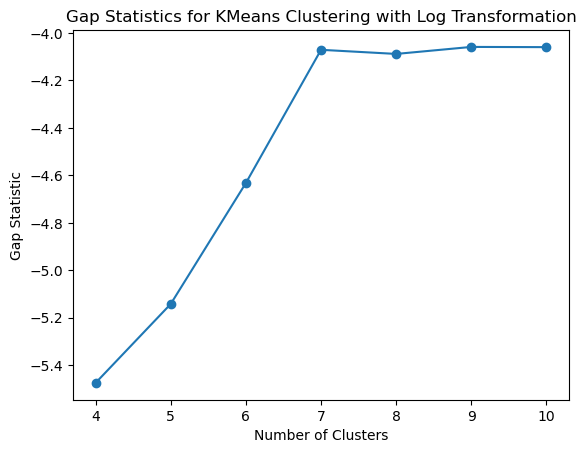

In [276]:
def within_cluster_dispersion(data, labels, centers):
    dispersion = 0
    for i in range(len(centers)):
        cluster_points = data[labels == i]
        dispersion += np.sum(np.linalg.norm(cluster_points - centers[i], axis=1) ** 2)
    return dispersion

def calculate_gap_statistics(data, num_clusters_list):
    gap_statistics = []

    for num_clusters in num_clusters_list:
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)

        # Calculate within-cluster dispersion for original data
        within_dispersion_original = within_cluster_dispersion(data, cluster_labels, kmeans.cluster_centers_)

        # Generate reference data and calculate within-cluster dispersion for reference data
        reference_data = np.random.rand(*data.shape)
        kmeans_reference = KMeans(n_clusters=num_clusters, random_state=42)
        cluster_labels_reference = kmeans_reference.fit_predict(reference_data)
        within_dispersion_reference = within_cluster_dispersion(reference_data, cluster_labels_reference, kmeans_reference.cluster_centers_)

        # Calculate gap statistic
        gap_statistic = np.log(within_dispersion_reference) - np.log(within_dispersion_original)
        gap_statistics.append(gap_statistic)

    return gap_statistics

num_clusters_list = [4, 5, 6, 7, 8, 9, 10]

gap_stats = calculate_gap_statistics(df_log_PCA24, num_clusters_list)

plt.plot(num_clusters_list, gap_stats, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistics for KMeans Clustering with Log Transformation')
plt.show()


From the graph we can observe that the optimal no. of clusters is 7, as the plateau after 7 indicates that additional clusters  does not significantly improve the quality of the clustering. 
If model complexity is a concern, number of clusters can be decreased for simpler model